<a href="https://colab.research.google.com/github/vanujiash9/-df/blob/main/Project_Movie_Ticket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Load data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


In [ ]:
df_campaign = pd.read_csv('/content/drive/MyDrive/DATA SET/movie_ticket_data/campaign.csv')
df_customer = pd.read_csv('/content/drive/MyDrive/DATA SET/movie_ticket_data/customer.csv')
df_device = pd.read_csv('/content/drive/MyDrive/DATA SET/movie_ticket_data/device_detail.csv')
df_status = pd.read_csv('/content/drive/MyDrive/DATA SET/movie_ticket_data/status_detail.csv')
df_ticket = pd.read_csv('/content/drive/MyDrive/DATA SET/movie_ticket_data/ticket_history.csv')

# **2. Data cleaning**

## **2.1 Data type, NULL values, Duplicate values**

In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  131400 non-null  int64 
 1   usergender   131400 non-null  object
 2   dob          131400 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [ ]:
df_customer.head(5)

,customer_id,usergender,dob
0,100032,Female,8/8/1985
1,100046,Male,7/11/1987
2,100050,Male,11/19/1994
3,100063,Male,9/10/1999
4,100076,Female,5/14/1995


In [ ]:
df_customer.isnull().sum()

,0
customer_id,0
usergender,0
dob,0


In [ ]:
df_customer.duplicated().sum()

0

In [ ]:
from datetime import datetime
df_customer['dob'] = pd.to_datetime(df_customer['dob'])

In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  131400 non-null  int64         
 1   usergender   131400 non-null  object        
 2   dob          131400 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.0+ MB


In [ ]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    216 non-null    int64 
 1   campaign_type  216 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


In [ ]:
df_campaign.head(5)

,campaign_id,campaign_type
0,106460,direct discount
1,30040,direct discount
2,13810,voucher
3,78370,voucher
4,83700,voucher


In [ ]:
df_campaign.isnull().sum()

,0
campaign_id,0
campaign_type,0


In [ ]:
df_campaign.duplicated().sum()

0

In [ ]:
df_device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139902 entries, 0 to 139901
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   device_number  139901 non-null  object
 1   model          132763 non-null  object
 2   platform       139902 non-null  object
dtypes: object(3)
memory usage: 3.2+ MB


In [ ]:
df_device.head(5)

,device_number,model,platform
0,00006afbe30ae7018c92bb324cd58afc,browser,website
1,0000b0ce524ef4d66c7bfdad67a91970,devicemodel,mobile
2,0000e2a055b67fe49c06bbe28b268251,"iPhone10,2",mobile
3,00012f7a6842cca5d531b7c8b32967d6,"iPhone10,3",mobile
4,000215f1b9363b5465b8ee895fa6c920,devicemodel,mobile


In [ ]:
df_device.isnull().sum()

,0
device_number,1
model,7139
platform,0


In [ ]:
#create function calc null rate of each column
def calc_null_rate(df):
    newdf = df.isnull().sum().to_frame('null_count')
    newdf[['null_rate']] = newdf[['null_count']] / len(df)
    return newdf.sort_values(by=['null_rate'], ascending=False)

In [ ]:
calc_null_rate(df_device)

,null_count,null_rate
model,7139,0.051029
device_number,1,0.000007
platform,0,0.000000


In [ ]:
# thay thế NULL trong model thành 'unknow'
#xóa giá trị NULL trong cột device_number
df_device = df_device.fillna({'model' : 'unknow'})
df_device = df_device[df_device['device_number'].notna()]

In [ ]:
calc_null_rate(df_device)

,null_count,null_rate
device_number,0,0.0
model,0,0.0
platform,0,0.0


In [ ]:
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status_id    8 non-null      int64 
 1   description  8 non-null      object
 2   error_group  7 non-null      object
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes


In [ ]:
df_status.head(5)

,status_id,description,error_group
0,1,Order successful,NaN
1,-1,Payment overdue,customer
2,-2,Insufficient funds in customer account. Please add more funds and try the transaction again.,customer
3,-3,No response from your bank,external
4,-4,Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.,customer


In [ ]:
df_status.isnull().sum()

,0
status_id,0
description,0
error_group,1


In [ ]:
df_status.duplicated().sum()

0

In [ ]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154827 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ticket_id       154827 non-null  object 
 1   customer_id     154827 non-null  int64  
 2   paying_method   154827 non-null  object 
 3   theater_name    154827 non-null  float64
 4   device_number   154827 non-null  object 
 5   original_price  154827 non-null  float64
 6   discount_value  154827 non-null  float64
 7   final_price     154827 non-null  float64
 8   time            154827 non-null  object 
 9   status_id       154827 non-null  int64  
 10  campaign_id     154827 non-null  int64  
 11  movie_name      154827 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 14.2+ MB


In [ ]:
df_ticket.head(5)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder


In [ ]:
df_ticket.isnull().sum()

,0
ticket_id,0
customer_id,0
paying_method,0
theater_name,0
device_number,0
original_price,0
discount_value,0
final_price,0
time,0
status_id,0


In [ ]:
df_ticket.duplicated().sum()

102

In [ ]:
df_dup = df_ticket[df_ticket.duplicated(keep = False)]

In [ ]:
df_dup.head(5)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name
3555,c56e3eb9fb1fd241c9de7a700d7a52d2,206709,money in app,5.0,291f6a5c77b7d98a86fe76bdbabe94eb,5.77,1.03,4.74,2022-07-02 22:11:30.005,1,85940,Thor: Love And Thunder
3556,c56e3eb9fb1fd241c9de7a700d7a52d2,206709,money in app,5.0,291f6a5c77b7d98a86fe76bdbabe94eb,5.77,1.03,4.74,2022-07-02 22:11:30.005,1,85940,Thor: Love And Thunder
49730,763e20c9c1136c5c06d9a960fac9dae6,174180,credit card,29.0,ba5794fca2cba47fd0141dd3fb195934,7.42,0.00,7.42,2019-12-23 15:28:45.738,1,0,Dreamy Eyes
49731,763e20c9c1136c5c06d9a960fac9dae6,174180,credit card,29.0,ba5794fca2cba47fd0141dd3fb195934,7.42,0.00,7.42,2019-12-23 15:28:45.738,1,0,Dreamy Eyes
49876,257d0a0e6a7f38b90b5ecdfa9e8416b9,133912,money in app,119.0,18abc497c03f7e6bd0b0cf72a89fb911,7.42,0.00,7.42,2019-12-23 18:04:51.790,1,0,Dreamy Eyes


In [ ]:
df_ticket = df_ticket.drop_duplicates()

In [ ]:
df_ticket['time'] = pd.to_datetime(df_ticket['time'])

<ipython-input-32-fc8e5de5c3e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ticket['time'] = pd.to_datetime(df_ticket['time'])


In [ ]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154725 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154725 non-null  object        
 1   customer_id     154725 non-null  int64         
 2   paying_method   154725 non-null  object        
 3   theater_name    154725 non-null  float64       
 4   device_number   154725 non-null  object        
 5   original_price  154725 non-null  float64       
 6   discount_value  154725 non-null  float64       
 7   final_price     154725 non-null  float64       
 8   time            154725 non-null  datetime64[ns]
 9   status_id       154725 non-null  int64         
 10  campaign_id     154725 non-null  int64         
 11  movie_name      154725 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 15.3+ MB


## **2.2 Join tables**

In [ ]:
df_device.head(5)

,device_number,model,platform
0,00006afbe30ae7018c92bb324cd58afc,browser,website
1,0000b0ce524ef4d66c7bfdad67a91970,devicemodel,mobile
2,0000e2a055b67fe49c06bbe28b268251,"iPhone10,2",mobile
3,00012f7a6842cca5d531b7c8b32967d6,"iPhone10,3",mobile
4,000215f1b9363b5465b8ee895fa6c920,devicemodel,mobile


In [ ]:
#xuất phát từ bảng ticket để join với các bảng dimenssion còn lại
df_join_customer = pd.merge(df_ticket, df_customer, on='customer_id', how='left')
df_join_campagin = pd.merge(df_join_customer, df_campaign, on='campaign_id', how='left')
df_join_device = pd.merge(df_join_campagin, df_device, on='device_number', how='left')
df_join_all = pd.merge(df_join_device, df_status, on='status_id', how='left')

In [ ]:
df_join_all.count()

,0
ticket_id,154725
customer_id,154725
paying_method,154725
theater_name,154725
device_number,154725
original_price,154725
discount_value,154725
final_price,154725
time,154725
status_id,154725


In [ ]:
df_join_all.head(5)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,model,platform,description,error_group
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,"iPhone13,1",mobile,Order successful,NaN
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,browser,website,Order successful,NaN
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,NaN,unknow,mobile,Order successful,NaN
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,devicemodel,mobile,Order successful,NaN
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,devicemodel,mobile,Order successful,NaN


In [ ]:
calc_null_rate(df_join_all)

,null_count,null_rate
error_group,133679,0.863978
campaign_type,63098,0.407807
platform,78,0.000504
model,78,0.000504
campaign_id,0,0.000000
description,0,0.000000
dob,0,0.000000
usergender,0,0.000000
movie_name,0,0.000000
ticket_id,0,0.000000


In [ ]:
df_join_all = df_join_all.fillna('unknow')

In [ ]:
calc_null_rate(df_join_all)

,null_count,null_rate
ticket_id,0,0.0
campaign_id,0,0.0
description,0,0.0
platform,0,0.0
model,0,0.0
campaign_type,0,0.0
dob,0,0.0
usergender,0,0.0
movie_name,0,0.0
status_id,0,0.0


## **2.3 View all values of each columns**

In [ ]:
df_join_all.nunique().sort_values(ascending=False)

,0
ticket_id,154725
time,154725
device_number,126459
customer_id,119477
dob,11322
final_price,2715
original_price,1895
model,1215
movie_name,253
discount_value,242


In [ ]:
specific_cols = ['movie_name','description','paying_method','campaign_type','usergender','platform', 'error_group']
for col in specific_cols:
    print(col + ' : ', np.sort(df_join_all[col].unique().astype(str)))
    print('\r')
    print('--------------------------')
    print('\r')

movie_name :  ['13rd Sister' '13rd Sister: Three Deadly Days' '1990' '2037'
 '30 Chua Phai Tet' '47 Meters Down: Uncaged' 'A Chamada Da Selva'
 'A Diamond In The Rough' 'Accidentally Dad' 'Aladdin' 'Alienoid'
 'Alita: Battle Angel' 'Ambulance' 'Anchor' 'Angel Has Fallen' 'Anna'
 'Annabelle Comes Home' 'Aquaman' 'Around The World In 80 Days'
 'Autumn Promise' 'Avatar' 'Avatar: The Way Of Water' 'Avengers: Endgame'
 'Bad Boys For Life' 'Batman' 'Beast' 'Birds Of Prey' 'Black Adam'
 'Black Panther 2: Wakanda Forever' 'Black Panther: Wakanda Forever'
 'Blood Karma' 'Blood Moon Party' 'Bloodshot' 'Broker' 'Bullet Train'
 'Bumblebee' 'Bắc Kim Thang' 'Camellia Sisters' 'Captain Marvel'
 "Charlie's Angels" 'Cherry Magic The Movie Thirty Years'
 'Chickenhare And The Hamster Of Darkness' 'Chuyện Ma Đô Thị' 'Collectors'
 'Concessions' 'Confidential Assignment 2: International' 'Cracked'
 'Crawl' 'Crazy Romance' "Dad I'm Sorry" 'Daddy Issues' 'Daeng'
 'Dark Figure Of Crime' 'Dc League Of Super-Pet

# **3.Analyze**

## **3.1 Customer portrait**

### **Age and gender distribution**

In [ ]:
df_join_all.head(2)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,model,platform,description,error_group
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,"iPhone13,1",mobile,Order successful,unknow
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,browser,website,Order successful,unknow


In [ ]:
#Tính số tuổi
current_date = datetime.now()

df_join_all['age_days'] = (current_date - df_join_all['dob']).dt.days
df_join_all['age'] = df_join_all['age_days'] / 365.25
df_join_all['age'] = df_join_all['age'].astype(int)

In [ ]:
current_date

datetime.datetime(2024, 12, 3, 17, 2, 21, 634242)

In [ ]:
# lấy ra danh sách KH kèm theo age và gender
df_cus = df_join_all.drop_duplicates(subset =['customer_id'])[['customer_id', 'dob', 'age', 'usergender']]

In [ ]:
df_cus.count()

,0
customer_id,119477
dob,119477
age,119477
usergender,119477


In [ ]:
df_cus.head(2)

,customer_id,dob,age,usergender
0,100009,1989-02-25,35,Male
1,100493,1991-06-09,33,Male


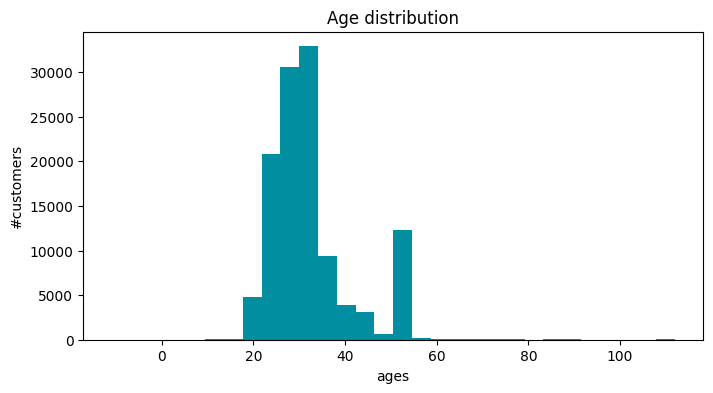

In [ ]:
#Phân bố khách hàng theo độ tuổi

plt.figure(figsize=(8,4))
df_cus['age'].hist(bins = 30, color = '#008EA0', grid=False)
plt.xlabel('ages')
plt.ylabel('#customers')
plt.title('Age distribution')
plt.show()

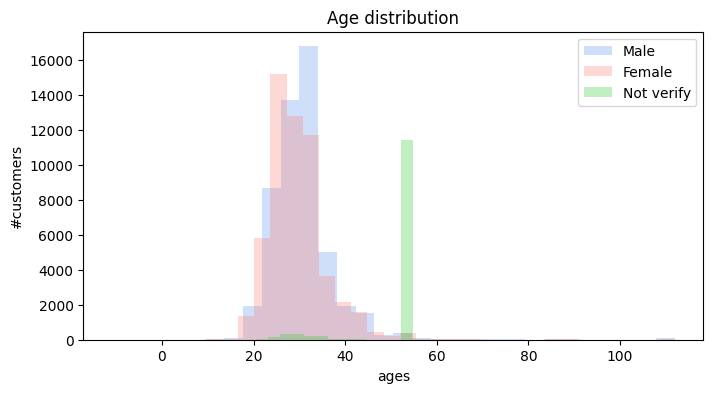

In [ ]:
# Phân bổ độ tuổi theo nhóm giới tính :
plt.figure(figsize=(8,4))

## data
male_age = df_cus[df_cus['usergender'] == 'Male']['age']
female_age = df_cus[df_cus['usergender'] == 'Female']['age']
unknown_age = df_cus[df_cus['usergender'] == 'Not verify']['age']

## plot
plt.hist(male_age, bins=30, alpha = 0.3, color = 'cornflowerblue', label = 'Male')
plt.hist(female_age, bins=30, alpha = 0.3, color = 'salmon', label = 'Female')
plt.hist(unknown_age, bins=30, alpha = 0.3, color = 'limegreen', label = 'Not verify')

##edit
plt.title('Age distribution')
plt.xlabel('ages')
plt.ylabel('#customers')
plt.legend()
plt.show()

In [ ]:
#Đánh giá chi tiết nhóm Not verify
df_gen = df_cus.groupby('usergender').agg(total = ('customer_id', 'count')).sort_values(by='total', ascending=False).reset_index()


In [ ]:
df_gen

,usergender,total
0,Female,55689
1,Male,50873
2,Not verify,12915


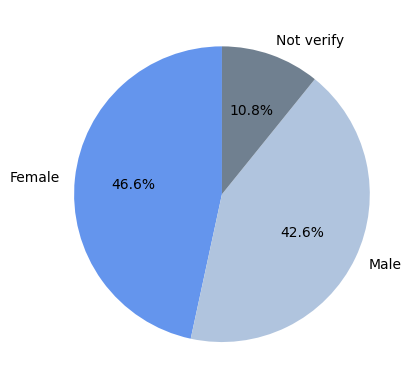

In [ ]:
#Visualize
plt.pie(df_gen['total'], labels = df_gen['usergender'], colors= ['cornflowerblue','lightsteelblue', 'slategrey'], autopct = '%1.1f%%', startangle = 90)
plt.show()



In [ ]:
df_cus[df_cus['usergender'] == 'Not verify'].groupby('age').agg(number = ('customer_id', 'count')).reset_index().sort_values(by='number', ascending=False)


,age,number
38,54,11435
13,29,141
10,26,119
11,27,113
15,31,112
16,32,108
12,28,102
14,30,101
18,34,94
9,25,93


> **Notes**

>-   Nhóm khách hàng chưa verify tài khoản chiếm hơn 11%. Dẫn tới 2 trường hợp:
>> - Nếu học nhập dob thì sẽ có data
>> - Nếu học không nhập thì hệ thống sẽ auto fill là 1970 ->54 tuổi





### **Age generation distribution**

In [ ]:
# Logic phân loại thế hệ X, Y, Z Baby boomers --> dựa vào năm sinh

df_cus['age_generation'] = df_cus['dob'].apply(lambda x: 'baby boomers' if x.year < 1965 else 'gen X' if x.year < 1981 else 'gen Y' if x.year < 1997 else 'gen Z')

In [ ]:
df_gen_group = df_cus[df_cus['usergender'] != 'Not verify'].groupby('age_generation').agg(total = ('customer_id', 'count')).sort_values(by='total', ascending=False).reset_index()

In [ ]:
df_gen_group.head(5)

,age_generation,total
0,gen Y,63310
1,gen Z,38401
2,gen X,4261
3,baby boomers,590


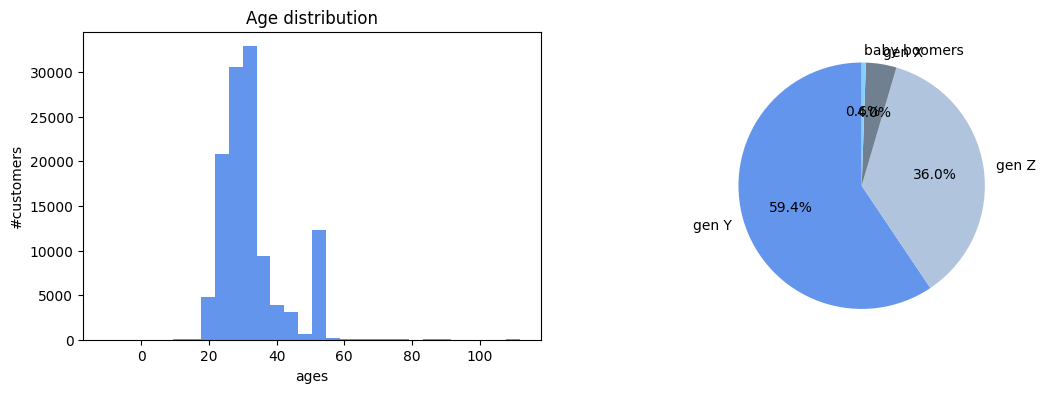

In [ ]:
from re import A
# Kết hợp 2 biểu đồ cùng lúc:
plt.figure(figsize=(13, 4))
#plot 1
ax1 = plt.subplot(1, 2, 1)
df_cus['age'].hist(bins = 30, color = 'cornflowerblue', grid=False)
plt.xlabel('ages')
plt.ylabel('#customers')
plt.title('Age distribution')
#plot 2
ax2 = plt.subplot(1, 2, 2)
plt.pie(df_gen_group['total'], labels = df_gen_group['age_generation'], colors= ['cornflowerblue','lightsteelblue', 'slategrey', 'lightskyblue'], autopct = '%1.1f%%', startangle = 90)
plt.show()


## **3.2 Time series data - When did customers buy tickets?**

### **Trend by month**

In [ ]:
df_join_all.head(5)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,model,platform,description,error_group,age_days,age
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,"iPhone13,1",mobile,Order successful,unknow,13065,35
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,browser,website,Order successful,unknow,12231,33
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknow,unknow,mobile,Order successful,unknow,12983,35
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,devicemodel,mobile,Order successful,unknow,9956,27
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,devicemodel,mobile,Order successful,unknow,13223,36


In [ ]:
df_join_all['month'] = pd.to_datetime(df_join_all['time']).dt.month
df_join_all['year_month'] = pd.to_datetime(df_join_all['time']).dt.strftime('%Y-%m')
df_join_all['name_day'] = pd.to_datetime(df_join_all['time']).dt.day_name()
df_join_all['hour'] = pd.to_datetime(df_join_all['time']).dt.hour

In [ ]:
#Thống kê theo tháng
df_time_month = (
    df_join_all
    .groupby('year_month')
    .agg(total_ticket = ('ticket_id', 'count'))
    .reset_index()
)

In [ ]:
df_time_month.head(5)

,year_month,total_ticket
0,2019-01,2019
1,2019-02,1626
2,2019-03,1004
3,2019-04,4069
4,2019-05,4430


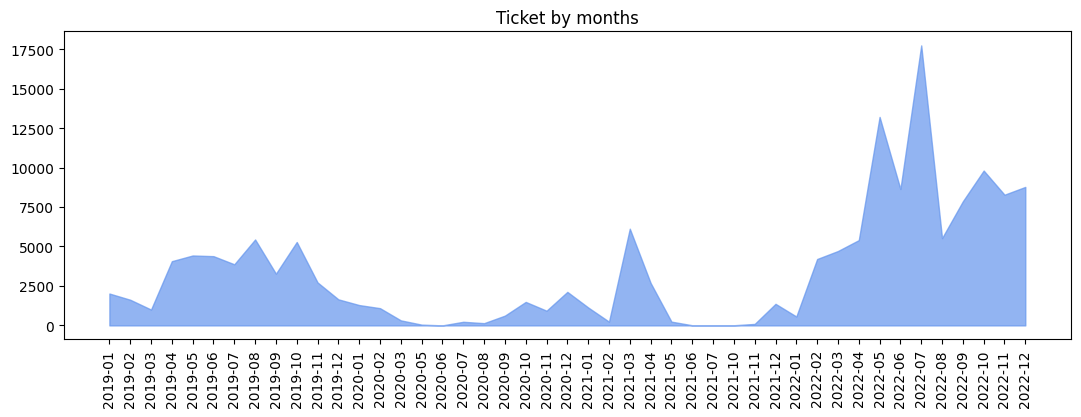

In [ ]:
# Vẽ biểu đồ miền theo tháng:
plt.figure(figsize = (13, 4))
plt.fill_between(df_time_month['year_month'], df_time_month['total_ticket'], color = 'cornflowerblue', alpha = 0.7)
plt.title('Ticket by months')
plt.xticks(rotation = 90)
plt.show()


In [ ]:
## Giai đoạn covid diễn ra -> người ta không đi xem phim
# --> mình sẽ cần 1 bảng DIM thời gian theo tháng (FULL)

In [ ]:
### tạo bảng DIM time để JOIN lại với data ticket và vẽ lại chart

In [ ]:
# Tạo bảng dimension thời gian:

# Xác định khoảng thời gian
start_date = '2019-01-01'
end_date = '2022-12-31'

# Tạo ra range thời gian từ 2 mốc start và end
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

# Lấy ra list phần tử thời gian tương ứng:
list_month = date_range.month
list_month_name = date_range.strftime('%B')
list_year = date_range.year
list_year_month = date_range.strftime('%Y-%m')

# # Khởi tạo dataframe
dim_time = pd.DataFrame({
    'month_number': list_month,
    'month_name': list_month_name,
    'year': list_year,
    'year_month': list_year_month
})

In [ ]:
#JOIN với bảng df_join_all để có đủ data thời gian
df_time_month_dim = pd.merge(dim_time, df_join_all, on='year_month', how='left').groupby('year_month').agg(total_ticket = ('ticket_id', 'count')).reset_index()

In [ ]:
df_time_month_dim.replace(0, np.nan, inplace=True)


In [ ]:
df_time_month_dim

,year_month,total_ticket
0,2019-01,2019.0
1,2019-02,1626.0
2,2019-03,1004.0
3,2019-04,4069.0
4,2019-05,4430.0
5,2019-06,4387.0
6,2019-07,3872.0
7,2019-08,5444.0
8,2019-09,3278.0
9,2019-10,5284.0


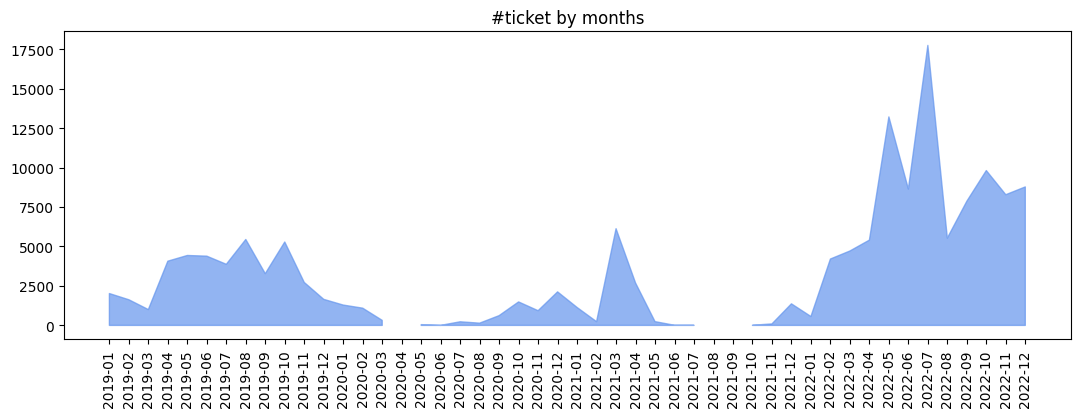

In [ ]:
# vẽ biểu đồ miền theo tháng:
plt.figure(figsize=(13, 4))

plt.fill_between(df_time_month_dim['year_month'], df_time_month_dim['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('#ticket by months')
plt.xticks(rotation=90)
plt.show()

### **Trend by week days**

In [ ]:
#Thống kê theo ngày trong tuần
df_week_day = (
    df_join_all.groupby(['name_day']).agg(total_ticket = ('ticket_id', 'count'))
    .reset_index()
)

In [ ]:
df_week_day

,name_day,total_ticket
0,Friday,26438
1,Monday,16702
2,Saturday,34450
3,Sunday,26960
4,Thursday,19101
5,Tuesday,14793
6,Wednesday,16281


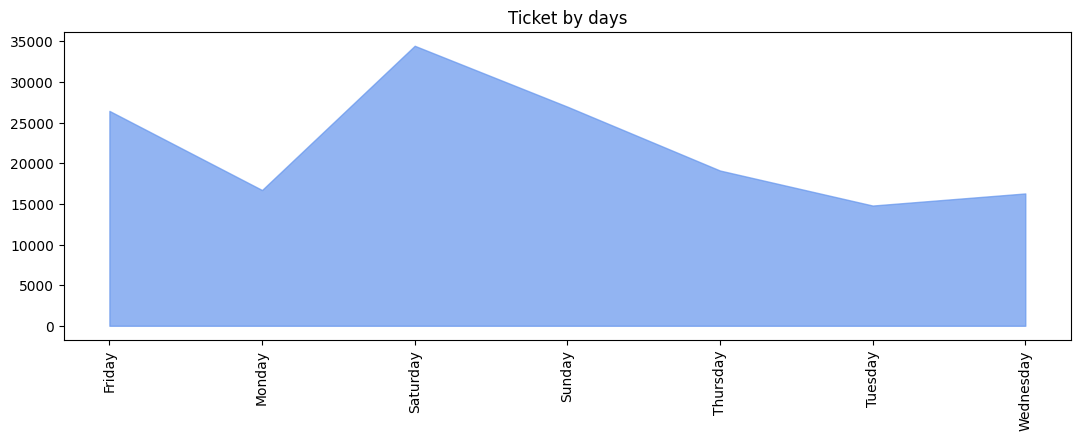

In [ ]:
# Vẽ biểu đồ miền theo ngày:
plt.figure(figsize = (13, 4))
plt.fill_between(df_week_day['name_day'], df_week_day['total_ticket'], color = 'cornflowerblue', alpha = 0.7)
plt.title('Ticket by days')
plt.xticks(rotation = 90)
plt.show()


In [ ]:
#Định nghĩa thứ tự của các ngày trong tuần
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Sắp xếp thứ tự các ngày trong tuần:
df_week_day['day_order'] = pd.Categorical(df_week_day['name_day'], categories=week_order, ordered=True)
df_week_day.sort_values('day_order', inplace=True)


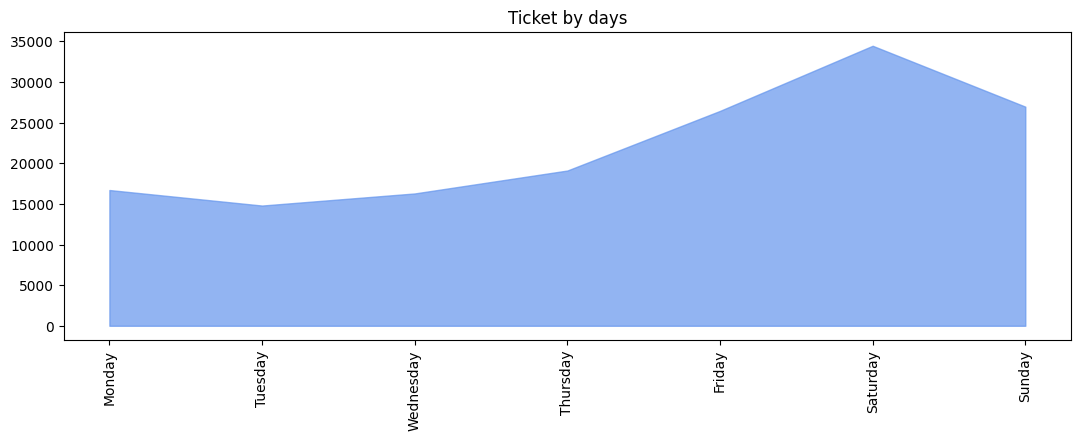

In [ ]:
# Vẽ biểu đồ miền theo ngày:
plt.figure(figsize = (13, 4))
plt.fill_between(df_week_day['name_day'], df_week_day['total_ticket'], color = 'cornflowerblue', alpha = 0.7)
plt.title('Ticket by days')
plt.xticks(rotation = 90)
plt.show()


###**Trend by hours**

In [ ]:
df_join_all.head(5)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,model,platform,description,error_group,age_days,age,month,year_month,name_day,hour
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,"iPhone13,1",mobile,Order successful,unknow,13065,35,7,2022-07,Friday,17
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,browser,website,Order successful,unknow,12231,33,7,2022-07,Friday,20
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknow,unknow,mobile,Order successful,unknow,12983,35,7,2022-07,Saturday,11
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,devicemodel,mobile,Order successful,unknow,9956,27,7,2022-07,Monday,22
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,devicemodel,mobile,Order successful,unknow,13223,36,7,2022-07,Sunday,18


In [ ]:
#Thống kê theo ngày trong tuần
df_hour = (
    df_join_all.groupby(['hour']).agg(total_ticket = ('ticket_id', 'count'))
    .reset_index()
)

In [ ]:
df_hour

,hour,total_ticket
0,0,2352
1,1,964
2,2,398
3,3,159
4,4,74
5,5,146
6,6,536
7,7,1473
8,8,3865
9,9,7111


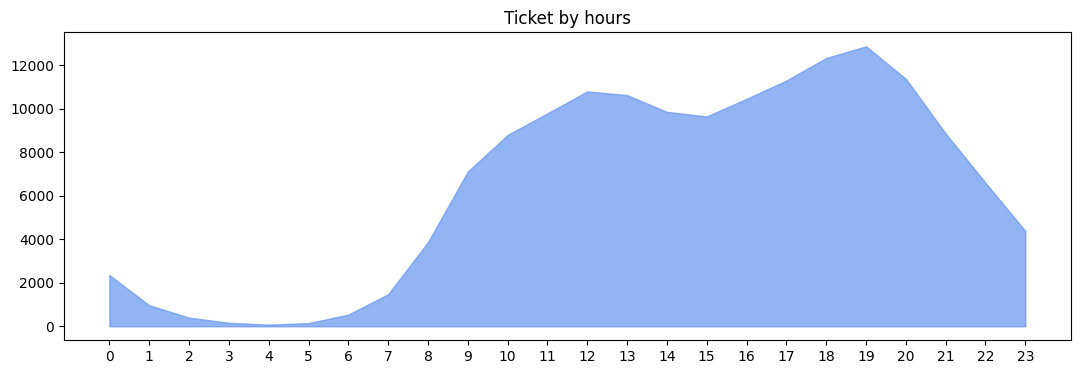

In [ ]:
# Vẽ biểu đồ miền theo ngày:
plt.figure(figsize = (13, 4))
plt.fill_between(df_hour['hour'], df_hour['total_ticket'], color = 'cornflowerblue', alpha = 0.7)
x_values = [i for i in range(24)]
plt.xticks(x_values)
plt.title('Ticket by hours')
plt.show()


###**Vẽ 3 biểu đồ chung 1 frame**

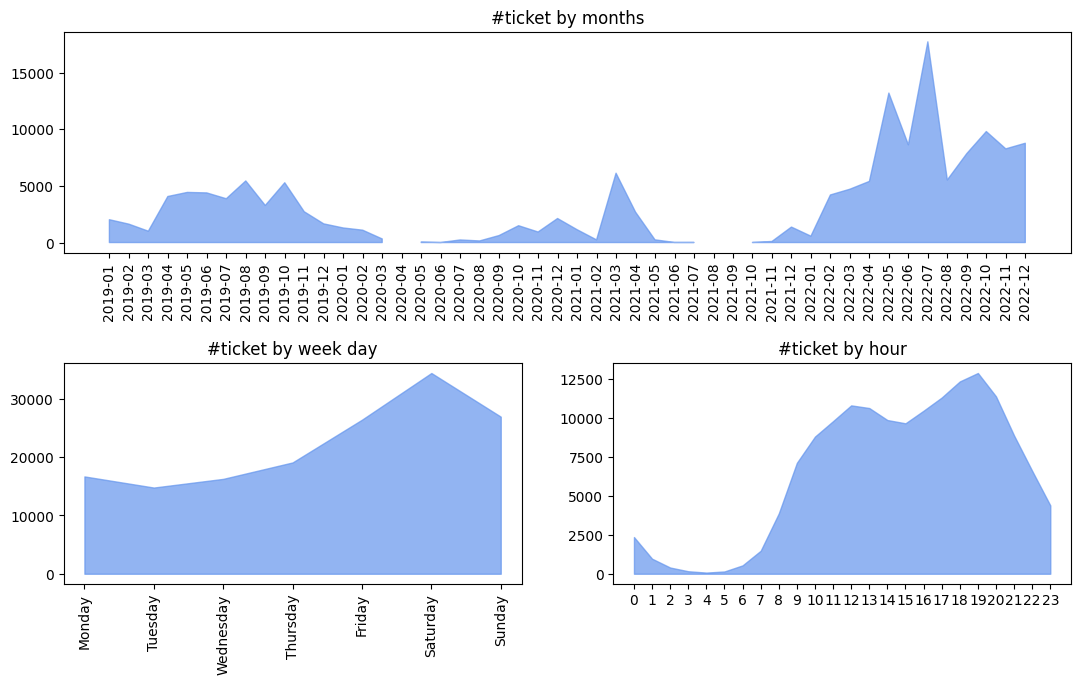

In [ ]:
# Vẽ chung trên 1 frame :
plt.figure(figsize=(13, 8))

# chart 1: Tháng
ax1 = plt.subplot(2, 1, 1)
plt.fill_between(df_time_month_dim['year_month'], df_time_month_dim['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('#ticket by months')
plt.xticks(rotation=90)

# chart 2: ngày
ax2 = plt.subplot(2, 2, 3)
plt.fill_between(df_week_day['name_day'], df_week_day['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('#ticket by week day')
plt.xticks(rotation=90)

# chart 3: giờ
ax3 = plt.subplot(2, 2, 4)
plt.fill_between(df_hour['hour'], df_hour['total_ticket'], color = 'cornflowerblue', alpha=0.7)
x_values = [i for i in range(24)]
plt.xticks(x_values)
plt.title('#ticket by hour')

plt.subplots_adjust( hspace = 0.5, top=0.8)

## **3.3 Fators related to the customer's purchasing process**

### **Payment platform**

In [ ]:
df_join_all.head(5)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,model,platform,description,error_group,age_days,age,month,year_month,name_day,hour
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,"iPhone13,1",mobile,Order successful,unknow,13065,35,7,2022-07,Friday,17
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,browser,website,Order successful,unknow,12231,33,7,2022-07,Friday,20
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknow,unknow,mobile,Order successful,unknow,12983,35,7,2022-07,Saturday,11
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,devicemodel,mobile,Order successful,unknow,9956,27,7,2022-07,Monday,22
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,devicemodel,mobile,Order successful,unknow,13223,36,7,2022-07,Sunday,18


In [ ]:
df_platform = (
    df_join_all[df_join_all['platform'] != 'unknow'].groupby(['platform']).agg(total_ticket = ('ticket_id', 'count'))
    .reset_index()
)


In [ ]:
df_platform.head(5)

,platform,total_ticket
0,mobile,138136
1,website,16511


Text(0.5, 1.0, '#ticket by platform')

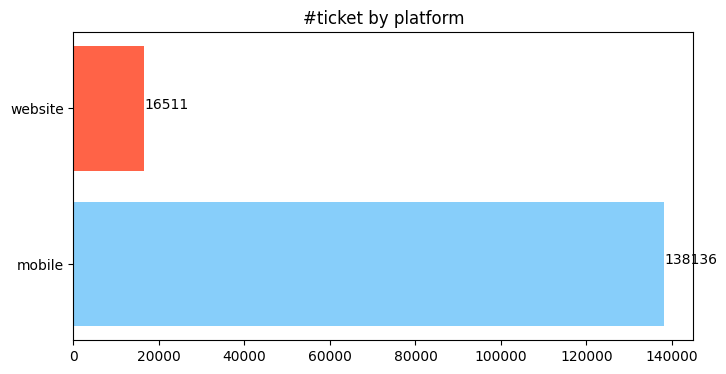

In [ ]:

# Biểu đồ cột ngang :
plt.figure(figsize=(8, 4))

plt.barh(
    df_platform['platform'], df_platform['total_ticket'],
    color = df_platform['platform'].replace({ 'mobile': 'lightskyblue',  'website': 'tomato'})
)

for index,value in enumerate(df_platform['total_ticket']):
    plt.text(value,index,str(value))

plt.title('#ticket by platform')

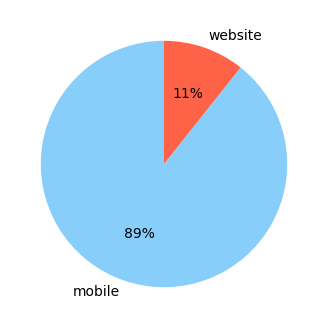

In [ ]:
plt.figure(figsize=(6, 4))
plt.pie(df_platform['total_ticket'], labels= df_platform['platform'],
        colors=df_platform['platform'].replace({'mobile': 'lightskyblue',  'website': 'tomato'}),
        autopct='%1.0f%%',
        startangle=90)
plt.show()

In [ ]:
#Theo thời gian
df_platform_time = (
    df_join_all[df_join_all['platform'] != 'unknow'].groupby(['year_month', 'platform']).agg(total_ticket = ('ticket_id', 'count')).sort_values(by='year_month', ascending=True).reset_index()
)

In [ ]:
df_platform_time

,year_month,platform,total_ticket
0,2019-01,mobile,2019
1,2019-02,mobile,1626
2,2019-03,mobile,1004
3,2019-04,mobile,4069
4,2019-05,mobile,4430
...,...,...,...
66,2022-10,website,1849
67,2022-11,mobile,6677
68,2022-11,website,1603
69,2022-12,mobile,6959


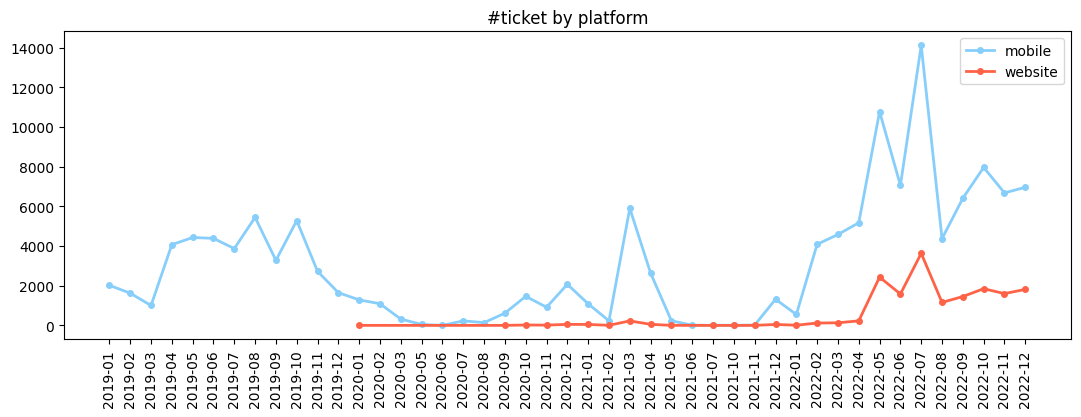

In [ ]:
# vẽ biểu đồ line chart:
plt.figure(figsize=(13,4))
df_mobile_line = df_platform_time[df_platform_time['platform'] == 'mobile']
plt.plot(df_mobile_line['year_month'], df_mobile_line['total_ticket'], marker ='o', color='lightskyblue', linewidth = 2, markersize = 4, label='mobile')

df_web_line = df_platform_time[df_platform_time['platform'] == 'website']
plt.plot(df_web_line['year_month'], df_web_line['total_ticket'],  marker ='o', linewidth = 2,color='tomato', markersize = 4, label='website')

plt.xticks(rotation=90)
plt.title('#ticket by platform')
plt.legend()

### **OS version**

In [ ]:
df_join_all.head(5)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,model,platform,description,error_group,age_days,age,month,year_month,name_day,hour
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,"iPhone13,1",mobile,Order successful,unknow,13065,35,7,2022-07,Friday,17
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,browser,website,Order successful,unknow,12231,33,7,2022-07,Friday,20
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknow,unknow,mobile,Order successful,unknow,12983,35,7,2022-07,Saturday,11
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,devicemodel,mobile,Order successful,unknow,9956,27,7,2022-07,Monday,22
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,devicemodel,mobile,Order successful,unknow,13223,36,7,2022-07,Sunday,18


In [ ]:
#Phân loại thiết bị OS version thành các nhóm : android_others, ios, unknown, browser
df_join_all['os_version'] = df_join_all['model'].apply(lambda x:'ios' if ('iPhone' in x or'iPod' in x)
                                                      else 'browser' if x == 'browser'
                                                      else 'unknown' if ('devicemodel' in x or 'unknow' in x)
                                                      else 'android & other')

In [ ]:
df_join_all['os_version'].unique()

array(['ios', 'browser', 'unknown', 'android & other'], dtype=object)

In [ ]:
#Group by để thống kê
df_os = (
    df_join_all.groupby('os_version')
    .agg(total_ticket = ('ticket_id', 'count'))
    .sort_values(by='total_ticket', ascending=False)
    .reset_index()
)

In [ ]:
df_os

,os_version,total_ticket
0,unknown,68854
1,ios,51402
2,android & other,21092
3,browser,13377


<BarContainer object of 4 artists>

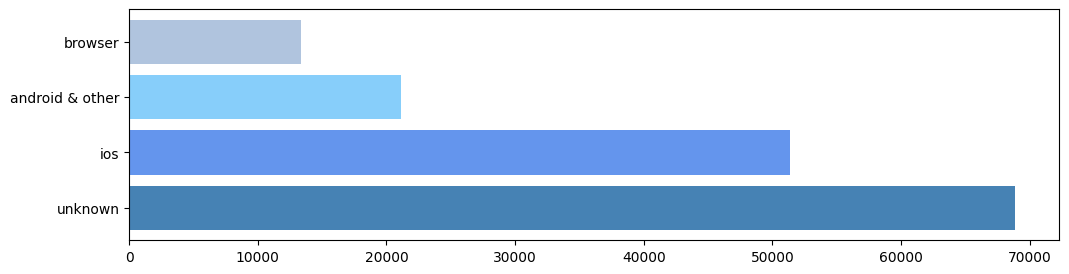

In [ ]:
plt.figure(figsize=(12, 3))
plt.barh(
    df_os['os_version'], df_os['total_ticket'],
    color = df_os['os_version'].replace({ 'browser': 'lightsteelblue',  'android & other': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'})
)

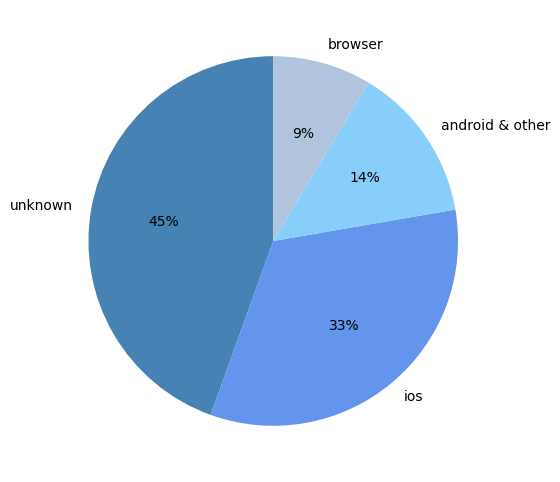

In [ ]:
plt.figure(figsize=(8,6))

plt.pie(df_os['total_ticket'], labels= df_os['os_version'],
        colors=df_os['os_version'].replace({ 'browser': 'lightsteelblue',  'android & other': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'}),
        autopct='%1.0f%%',
        startangle=90)
plt.show()

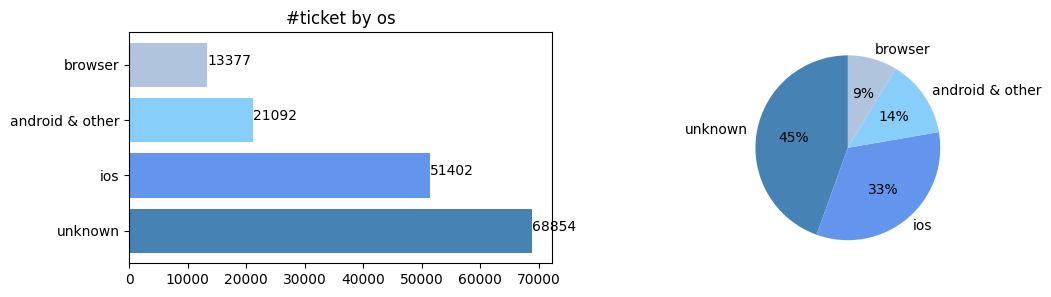

In [ ]:
# Biểu đồ cột ngang :
plt.figure(figsize=(12, 3))

ax1 = plt.subplot(1,2,1)
plt.barh(
    df_os['os_version'], df_os['total_ticket'],
    color = df_os['os_version'].replace({ 'browser': 'lightsteelblue',  'android & other': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'})
)

for index,value in enumerate(df_os['total_ticket']):
    plt.text(value,index,str(value))
plt.title('#ticket by os')

ax2 = plt.subplot(1,2,2)
plt.pie(df_os['total_ticket'], labels= df_os['os_version'],
        colors=df_os['os_version'].replace({ 'browser': 'lightsteelblue',  'android & other': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'}),
        autopct='%1.0f%%',
        startangle=90)
plt.show()

In [ ]:
df_os_time = (
    df_join_all.groupby(['year_month', 'os_version'])
    .agg(total_ticket = ('ticket_id', 'count'))
    .sort_values(by='year_month', ascending=True)
    .reset_index()
)


In [ ]:
df_os_time.head()

,year_month,os_version,total_ticket
0,2019-01,android & other,713
1,2019-01,ios,1233
2,2019-01,unknown,73
3,2019-02,android & other,542
4,2019-02,ios,1074


In [ ]:
#Xử lý data dạng PIVOT để vẽ biểu đồ miền
df_os_time = (
    df_join_all.pivot_table(index = 'year_month', columns = 'os_version', values = 'ticket_id', aggfunc = 'count')
    .reset_index()
)


In [ ]:
df_os_time.head(5)

os_version,year_month,android & other,browser,ios,unknown
0,2019-01,713.0,NaN,1233.0,73.0
1,2019-02,542.0,NaN,1074.0,10.0
2,2019-03,371.0,NaN,631.0,2.0
3,2019-04,1519.0,NaN,2541.0,9.0
4,2019-05,1601.0,NaN,2826.0,3.0


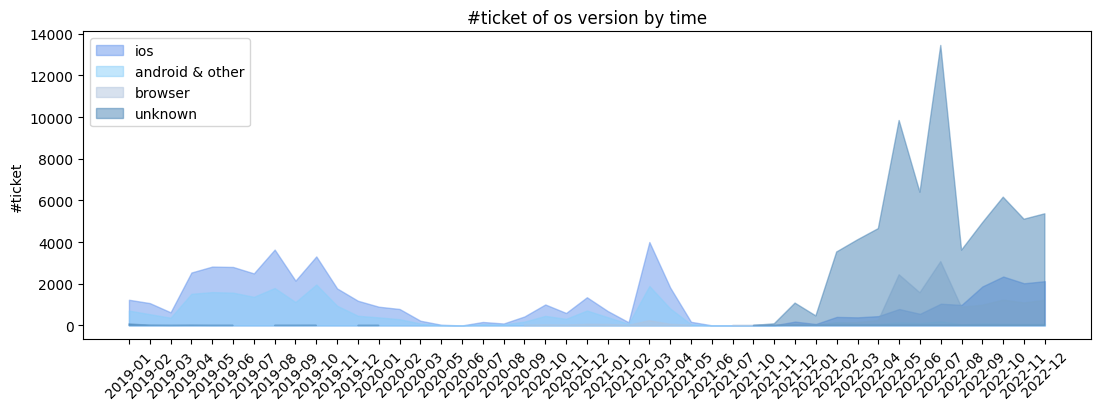

In [ ]:
# Draw TIME domain chart

plt.figure(figsize=(13, 4))

plt.fill_between (df_os_time['year_month'], df_os_time['ios'], color='cornflowerblue', alpha=0.5, label='ios')

plt.fill_between (df_os_time['year_month'], df_os_time['android & other'], color='lightskyblue', alpha=0.5, label='android & other')

plt.fill_between (df_os_time['year_month'], df_os_time ['browser'], color='lightsteelblue', alpha=0.5, label='browser')

plt.fill_between (df_os_time['year_month'], df_os_time['unknown'], color='steelblue', alpha=0.5, label='unknown')

# Show the chart

plt.title('#ticket of os version by time')

# plt.xlabel("Month')

plt.ylabel('#ticket')

plt.legend(loc='upper left')

plt.xticks(rotation=45)

plt.show()

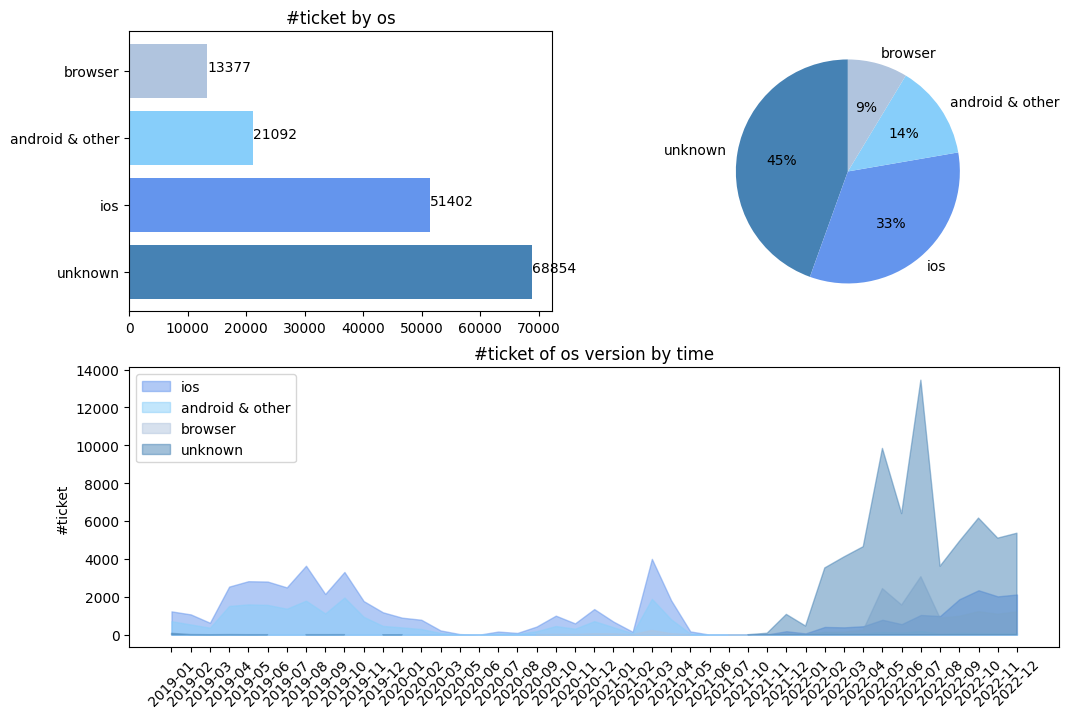

In [ ]:
#Biểu diễn chung 1 data frame
plt.figure(figsize = (12, 8))
ax1 = plt.subplot(2, 2, 1)
plt.barh(
    df_os['os_version'], df_os['total_ticket'],
    color = df_os['os_version'].replace({ 'browser': 'lightsteelblue',  'android & other': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'})
)
for index, value in enumerate(df_os['total_ticket']):
    plt.text(value, index, str(value))
plt.title('#ticket by os')

ax2 = plt.subplot(2, 2, 2)
plt.pie(df_os['total_ticket'], labels= df_os['os_version'],
      colors=df_os['os_version'].replace({ 'browser': 'lightsteelblue',  'android & other': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'}),
    autopct='%1.0f%%', startangle=90)

ax3 = plt.subplot(2, 1, 2)
plt.fill_between (df_os_time['year_month'], df_os_time['ios'], color='cornflowerblue', alpha=0.5, label='ios')

plt.fill_between (df_os_time['year_month'], df_os_time['android & other'], color='lightskyblue', alpha=0.5, label='android & other')

plt.fill_between (df_os_time['year_month'], df_os_time ['browser'], color='lightsteelblue', alpha=0.5, label='browser')

plt.fill_between (df_os_time['year_month'], df_os_time['unknown'], color='steelblue', alpha=0.5, label='unknown')

# Show the chart

plt.title('#ticket of os version by time')

# plt.xlabel("Month')

plt.ylabel('#ticket')

plt.legend(loc='upper left')

plt.xticks(rotation=45)
plt.show()

### **Payment method**

In [ ]:
df_join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,model,platform,description,error_group,age_days,age,month,year_month,name_day,hour,os_version
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,"iPhone13,1",mobile,Order successful,unknow,13065,35,7,2022-07,Friday,17,ios
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,browser,website,Order successful,unknow,12231,33,7,2022-07,Friday,20,browser
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknow,unknow,mobile,Order successful,unknow,12983,35,7,2022-07,Saturday,11,unknown
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,devicemodel,mobile,Order successful,unknow,9956,27,7,2022-07,Monday,22,unknown
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,devicemodel,mobile,Order successful,unknow,13223,36,7,2022-07,Sunday,18,unknown


In [ ]:
df_method = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
    .groupby('paying_method')
    .agg(total_ticket = ('ticket_id', 'count'))
    .sort_values(by='total_ticket', ascending=True)
    .reset_index()
)


In [ ]:
#Xử lí data dạng PIVOT để vẽ biểu đồ miền:
df_method_time = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
    .pivot_table(index = 'year_month', columns = 'paying_method', values = 'ticket_id', aggfunc = 'count')
    .reset_index()
)


In [ ]:
df_method_time.head(5)

paying_method,year_month,bank account,credit card,debit card,money in app
0,2019-01,487.0,336.0,93.0,443.0
1,2019-02,484.0,370.0,93.0,480.0
2,2019-03,304.0,225.0,74.0,263.0
3,2019-04,1050.0,705.0,189.0,1246.0
4,2019-05,1092.0,903.0,212.0,1410.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 [Text(0, 0, '2019-01'),
  Text(1, 0, '2019-02'),
  Text(2, 0, '2019-03'),
  Text(3, 0, '2019-04'),
  Text(4, 0, '2019-05'),
  Text(5, 0, '2019-06'),
  Text(6, 0, '2019-07'),
  Text(7, 0, '2019-08'),
  Text(8, 0, '2019-09'),
  Text(9, 0, '2019-10'),
  Text(10, 0, '2019-11'),
  Text(11, 0, '2019-12'),
  Text(12, 0, '2020-01'),
  Text(13, 0, '2020-02'),
  Text(14, 0, '2020-03'),
  Text(15, 0, '2020-05'),
  Text(16, 0, '2020-06'),
  Text(17, 0, '2020-07'),
  Text(18, 0, '2020-08'),
  Text(19, 0, '2020-09'),
  Text(20, 0, '2020-10'),
  Text(21, 0, '2020-11'),
  Text(22, 0, '2020-12'),
  Text(23, 0, '2021-01'),
  Text(24, 0, '2021-02'),
  Text(25, 0, '2021-03'),
  Text(26, 0, '2021-04'),
  Text(27, 0, '2021-05'),
  Text(28, 0, '2021-0

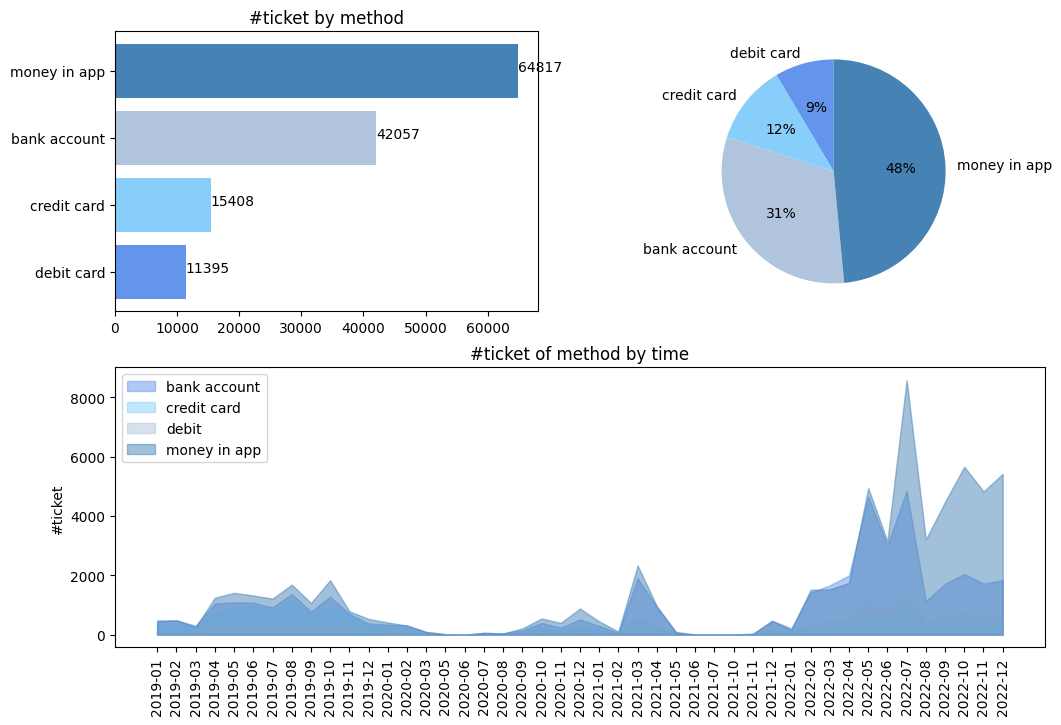

In [ ]:
# biểu diễn chung 1 frame
plt.figure(figsize=(12, 8))

ax1 = plt.subplot(2,2,1)
plt.barh(
    df_method['paying_method'], df_method['total_ticket'],
    color = df_method['paying_method'].replace({ 'bank account': 'lightsteelblue',  'credit card': 'lightskyblue', 'debit card': 'cornflowerblue', 'money in app': 'steelblue'})
)

for index,value in enumerate(df_method['total_ticket']):
    plt.text(value,index,str(value))
plt.title('#ticket by method')

ax2 = plt.subplot(2,2,2)
plt.pie(df_method['total_ticket'], labels= df_method['paying_method'],
        colors=df_method['paying_method'].replace({ 'bank account': 'lightsteelblue',  'credit card': 'lightskyblue', 'debit card': 'cornflowerblue', 'money in app': 'steelblue'}),
        autopct='%1.0f%%',
        startangle=90)

ax3 = plt.subplot(2,1,2)
plt.fill_between(df_method_time['year_month'], df_method_time['bank account'], color='cornflowerblue', alpha=0.5, label='bank account')
plt.fill_between(df_method_time['year_month'], df_method_time['credit card'], color='lightskyblue', alpha=0.5, label='credit card')
plt.fill_between(df_method_time['year_month'], df_method_time['debit card'], color='lightsteelblue', alpha=0.5, label='debit')
plt.fill_between(df_method_time['year_month'], df_method_time['money in app'], color='steelblue', alpha=0.5, label='money in app')

plt.title('#ticket of method by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.legend(loc='upper left')
plt.xticks(rotation=90)




In [ ]:
# biểu đồ miền 100%
df_method_time = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
    .pivot_table(index = 'year_month', columns = 'paying_method', values = 'ticket_id', aggfunc = 'count')
    .reset_index()
)
df_method_time_pct = df_method_time.copy()
df_method_time_pct = df_method_time_pct.fillna(0)
df_method_time_pct['total'] =df_method_time_pct.iloc[:, 1:5].sum(axis=1)
for i in df_method_time_pct.columns[1:5]:
    df_method_time_pct[i + '_pct'] = df_method_time_pct[i] / df_method_time_pct['total']
df_method_time_pct.head(10)

paying_method,year_month,bank account,credit card,debit card,money in app,total,bank account_pct,credit card_pct,debit card_pct,money in app_pct
0,2019-01,487.0,336.0,93.0,443.0,1359.0,0.358352,0.247241,0.068433,0.325975
1,2019-02,484.0,370.0,93.0,480.0,1427.0,0.339173,0.259285,0.065172,0.336370
2,2019-03,304.0,225.0,74.0,263.0,866.0,0.351039,0.259815,0.085450,0.303695
3,2019-04,1050.0,705.0,189.0,1246.0,3190.0,0.329154,0.221003,0.059248,0.390596
4,2019-05,1092.0,903.0,212.0,1410.0,3617.0,0.301908,0.249654,0.058612,0.389826
5,2019-06,1074.0,962.0,249.0,1319.0,3604.0,0.298002,0.266926,0.069090,0.365982
6,2019-07,916.0,782.0,252.0,1215.0,3165.0,0.289415,0.247077,0.079621,0.383886
7,2019-08,1367.0,1142.0,321.0,1684.0,4514.0,0.302836,0.252991,0.071112,0.373062
8,2019-09,774.0,711.0,219.0,1068.0,2772.0,0.279221,0.256494,0.079004,0.385281
9,2019-10,1280.0,914.0,309.0,1833.0,4336.0,0.295203,0.210793,0.071264,0.422740


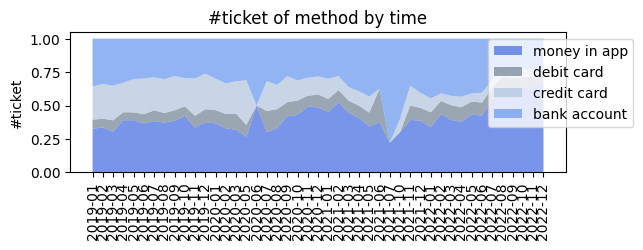

In [ ]:
ax4 = plt.subplot(2,1,2)
# vẽ biểu đồ miền 100%
plt.stackplot(df_method_time_pct['year_month'], df_method_time_pct["money in app_pct"],  df_method_time_pct['debit card_pct'], df_method_time_pct['credit card_pct'], df_method_time_pct['bank account_pct']
              , labels=['money in app', 'debit card', 'credit card', 'bank account'], colors=['royalblue', 'slategrey', 'lightsteelblue', 'cornflowerblue'], alpha=0.7)

plt.title('#ticket of method by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)

plt.subplots_adjust(hspace = 0.7, top = 0.9)

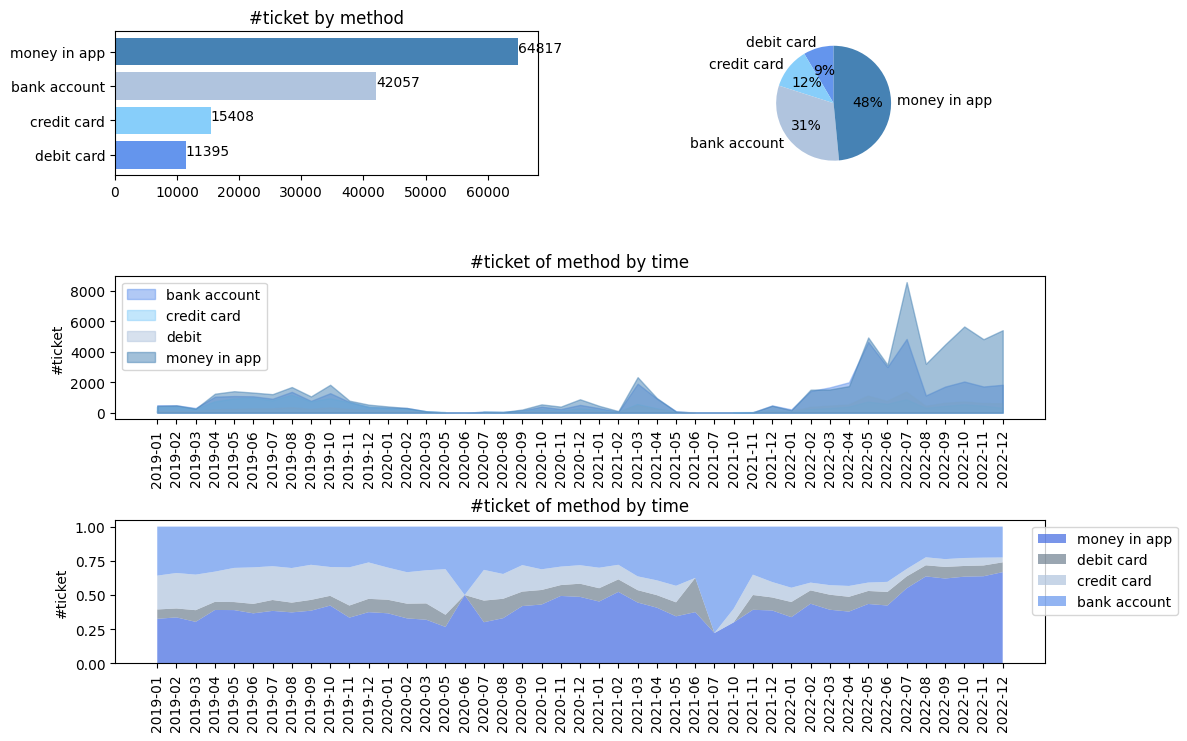

In [ ]:
# biểu diễn chung 1 frame
plt.figure(figsize=(12, 8))

ax1 = plt.subplot(3,2,1)
plt.barh(
    df_method['paying_method'], df_method['total_ticket'],
    color = df_method['paying_method'].replace({ 'bank account': 'lightsteelblue',  'credit card': 'lightskyblue', 'debit card': 'cornflowerblue', 'money in app': 'steelblue'})
)

for index,value in enumerate(df_method['total_ticket']):
    plt.text(value,index,str(value))
plt.title('#ticket by method')

ax2 = plt.subplot(3,2,2)
plt.pie(df_method['total_ticket'], labels= df_method['paying_method'],
        colors=df_method['paying_method'].replace({ 'bank account': 'lightsteelblue',  'credit card': 'lightskyblue', 'debit card': 'cornflowerblue', 'money in app': 'steelblue'}),
        autopct='%1.0f%%',
        startangle=90)

ax3 = plt.subplot(3,1,2)
plt.fill_between(df_method_time['year_month'], df_method_time['bank account'], color='cornflowerblue', alpha=0.5, label='bank account')
plt.fill_between(df_method_time['year_month'], df_method_time['credit card'], color='lightskyblue', alpha=0.5, label='credit card')
plt.fill_between(df_method_time['year_month'], df_method_time['debit card'], color='lightsteelblue', alpha=0.5, label='debit')
plt.fill_between(df_method_time['year_month'], df_method_time['money in app'], color='steelblue', alpha=0.5, label='money in app')

plt.title('#ticket of method by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.legend(loc='upper left')
plt.xticks(rotation=90)


ax4 = plt.subplot(3,1,3)
# vẽ biểu đồ miền 100%
plt.stackplot(df_method_time_pct['year_month'], df_method_time_pct["money in app_pct"],  df_method_time_pct['debit card_pct'], df_method_time_pct['credit card_pct'], df_method_time_pct['bank account_pct']
              , labels=['money in app', 'debit card', 'credit card', 'bank account'], colors=['royalblue', 'slategrey', 'lightsteelblue', 'cornflowerblue'], alpha=0.7)

plt.title('#ticket of method by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)

plt.subplots_adjust(hspace = 0.7, top = 0.9)

### **Promotion**

In [ ]:
df_join_all.head(5)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,model,platform,description,error_group,age_days,age,month,year_month,name_day,hour,os_version
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,"iPhone13,1",mobile,Order successful,unknow,13065,35,7,2022-07,Friday,17,ios
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,browser,website,Order successful,unknow,12231,33,7,2022-07,Friday,20,browser
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknow,unknow,mobile,Order successful,unknow,12983,35,7,2022-07,Saturday,11,unknown
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,devicemodel,mobile,Order successful,unknow,9956,27,7,2022-07,Monday,22,unknown
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,devicemodel,mobile,Order successful,unknow,13223,36,7,2022-07,Sunday,18,unknown


In [ ]:
df_join_all['campaign_type'].unique()

array(['direct discount', 'unknow', 'voucher', 'reward point'],
      dtype=object)

In [ ]:
df_join_all['type'] = df_join_all['campaign_type'].apply(lambda x:'non-promotion' if x == 'unknow' else 'promotion')


In [ ]:
df_join_all.head(5)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,model,platform,description,error_group,age_days,age,month,year_month,name_day,hour,os_version,type
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,"iPhone13,1",mobile,Order successful,unknow,13065,35,7,2022-07,Friday,17,ios,promotion
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,browser,website,Order successful,unknow,12231,33,7,2022-07,Friday,20,browser,promotion
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknow,unknow,mobile,Order successful,unknow,12983,35,7,2022-07,Saturday,11,unknown,non-promotion
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,devicemodel,mobile,Order successful,unknow,9956,27,7,2022-07,Monday,22,unknown,promotion
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,devicemodel,mobile,Order successful,unknow,13223,36,7,2022-07,Sunday,18,unknown,promotion


In [ ]:
df_type = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
    .groupby('type')
    .agg(total_ticket = ('ticket_id', 'count'))
    .sort_values(by='total_ticket', ascending=True)
    .reset_index()
)


In [ ]:
df_type

,type,total_ticket
0,non-promotion,55155
1,promotion,78522


In [ ]:
#Xử lí data dạng PIVOT để vẽ biểu đồ miền:
df_type_time = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
    .pivot_table(index = 'year_month', columns = 'type', values = 'ticket_id', aggfunc = 'count')
    .reset_index()
)
df_type_time_pct = df_type_time.copy()
df_type_time_pct = df_type_time_pct.fillna(0)




In [ ]:
df_type_time_pct['total'] =df_type_time_pct.iloc[:, 1:].sum(axis=1)


In [ ]:
for i in df_type_time_pct.columns[1:3]:
  df_type_time_pct[i+'_pct'] = df_type_time_pct[i] / df_type_time_pct['total']

In [ ]:
df_type_time_pct.head(4)

type,year_month,non-promotion,promotion,total,non-promotion_pct,promotion_pct
0,2019-01,517.0,842.0,1359.0,0.380427,0.619573
1,2019-02,1335.0,92.0,1427.0,0.935529,0.064471
2,2019-03,835.0,31.0,866.0,0.964203,0.035797
3,2019-04,1699.0,1491.0,3190.0,0.532602,0.467398


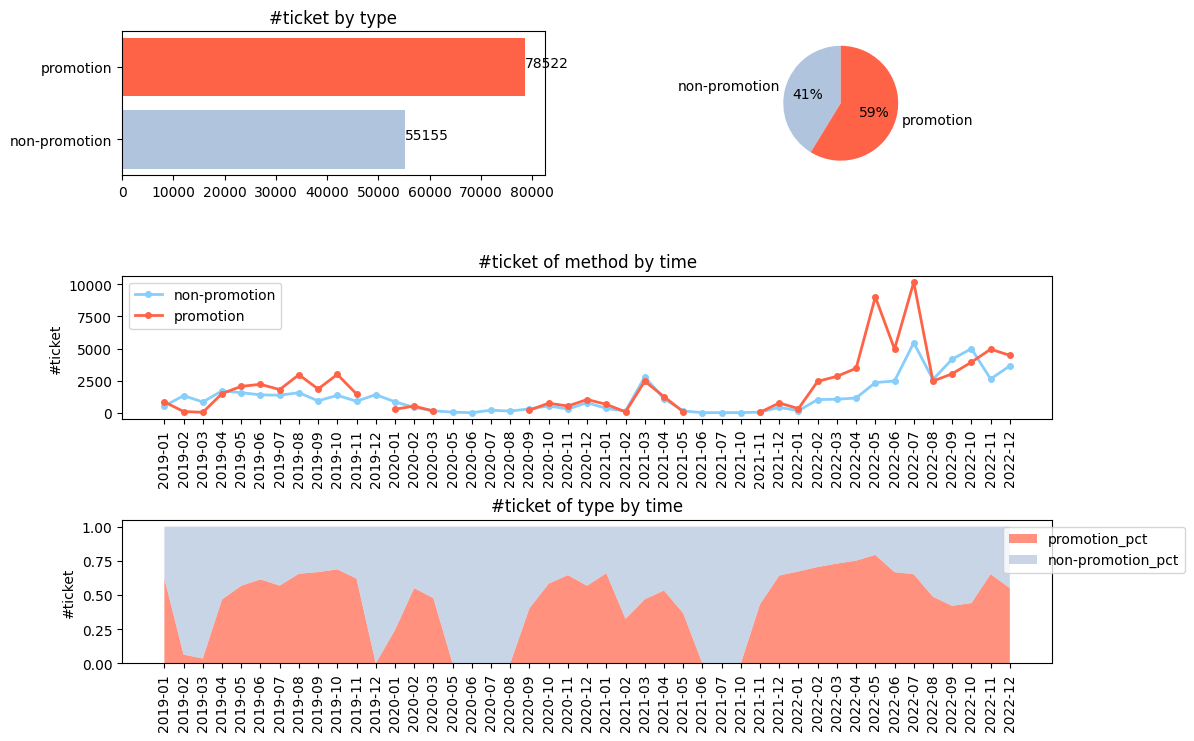

In [ ]:
# biểu diễn chung 1 frame
plt.figure(figsize=(12, 8))

ax1 = plt.subplot(3,2,1)
plt.barh(
    df_type['type'], df_type['total_ticket'],
    color = df_type['type'].replace({ 'non-promotion': 'lightsteelblue',  'promotion': 'tomato'})
)

for index,value in enumerate(df_type['total_ticket']):
    plt.text(value,index,str(value))
plt.title('#ticket by type')

ax2 = plt.subplot(3,2,2)
plt.pie(df_type['total_ticket'], labels= df_type['type'],
        colors=df_type['type'].replace({ 'non-promotion': 'lightsteelblue',  'promotion': 'tomato'}),
        autopct='%1.0f%%',
        startangle=90)

ax3 = plt.subplot(3,1,2)
plt.plot(df_type_time['year_month'], df_type_time['non-promotion'], marker ='o', color='lightskyblue', linewidth = 2, markersize = 4, label='non-promotion')

plt.plot(df_type_time['year_month'], df_type_time['promotion'],  marker ='o', linewidth = 2,color='tomato', markersize = 4, label='promotion')


plt.title('#ticket of method by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.legend(loc='upper left')
plt.xticks(rotation=90)


ax4 = plt.subplot(3,1,3)
# vẽ biểu đồ miền 100%
plt.stackplot(df_type_time_pct['year_month'],  df_type_time_pct['promotion_pct'], df_type_time_pct['non-promotion_pct']
              , labels=[ 'promotion_pct', 'non-promotion_pct'], colors=['tomato', 'lightsteelblue'], alpha=0.7)

plt.title('#ticket of type by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)

plt.subplots_adjust(hspace = 0.7, top = 0.9)

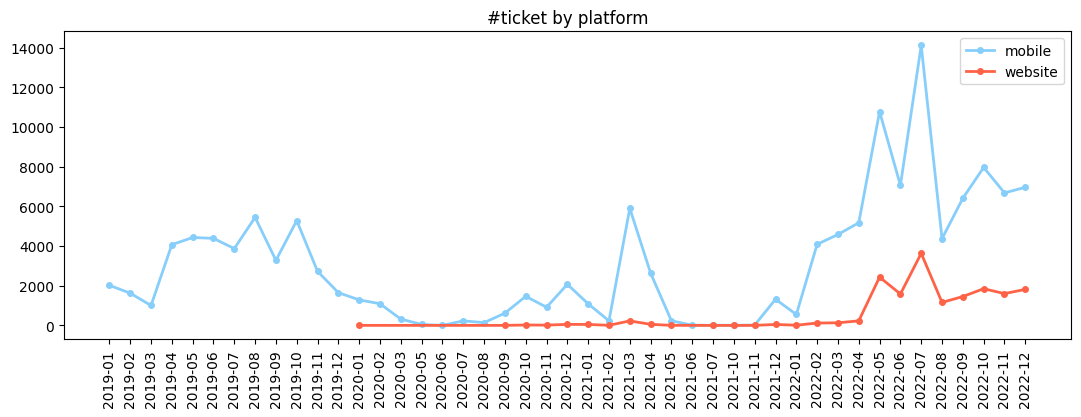

In [ ]:
# vẽ biểu đồ line chart:
plt.figure(figsize=(13,4))
df_type_time = df_platform_time[df_platform_time['platform'] == 'mobile']
plt.plot(df_type_time['year_month'], df_type_time['total_ticket'], marker ='o', color='lightskyblue', linewidth = 2, markersize = 4, label='mobile')

df_web_line = df_platform_time[df_platform_time['platform'] == 'website']
plt.plot(df_web_line['year_month'], df_web_line['total_ticket'],  marker ='o', linewidth = 2,color='tomato', markersize = 4, label='website')

plt.xticks(rotation=90)
plt.title('#ticket by platform')
plt.legend()

### **Which movies they watched?**

In [ ]:
df_join_all.head(5)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,model,platform,description,error_group,age_days,age,month,year_month,name_day,hour,os_version,type
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,"iPhone13,1",mobile,Order successful,unknow,13065,35,7,2022-07,Friday,17,ios,promotion
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,browser,website,Order successful,unknow,12231,33,7,2022-07,Friday,20,browser,promotion
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknow,unknow,mobile,Order successful,unknow,12983,35,7,2022-07,Saturday,11,unknown,non-promotion
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,devicemodel,mobile,Order successful,unknow,9956,27,7,2022-07,Monday,22,unknown,promotion
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,devicemodel,mobile,Order successful,unknow,13223,36,7,2022-07,Sunday,18,unknown,promotion


In [ ]:
df_film_sum = (
    df_join_all[df_join_all['status_id'] ==1]\
    .groupby('movie_name')\
    .agg(total_ticket = ('ticket_id', 'count'),
         total_customer = ('customer_id', 'nunique'),
         revenue = ('final_price', 'sum'))
    .sort_values(by='total_ticket', ascending=False)
    .reset_index()
)


In [ ]:
df_film_sum.head(5)

,movie_name,total_ticket,total_customer,revenue
0,Doctor Strange In The Multiverse Of Madness,8615,8409,65579.98
1,Minions: The Rise Of Gru,7224,7014,56530.93
2,Avatar: The Way Of Water,5870,5612,59830.95
3,Thor: Love And Thunder,5589,5478,43372.90
4,Peninsula,5499,5365,41208.44


In [ ]:
list_film = df_film_sum[df_film_sum['total_ticket'] > 1000]['movie_name'].unique()
list_selected_film = list(list_film)

In [ ]:
list_selected_film

['Doctor Strange In The Multiverse Of Madness',
 'Minions: The Rise Of Gru',
 'Avatar: The Way Of Water',
 'Thor: Love And Thunder',
 'Peninsula',
 'Black Panther 2: Wakanda Forever',
 'Black Adam',
 'Avengers: Endgame',
 "Dad I'm Sorry",
 'Love Destiny',
 'You And Trinh',
 'Fast & Furious Presents: Hobbs & Shaw',
 'Emergency Declaration',
 'Jurassic World Dominion',
 'Godzilla Vs. Kong',
 'Detective Conan: The Bride Of Halloween',
 'Joker',
 'Spider-Man: No Way Home',
 'Batman',
 'Blood Moon Party',
 'Fantastic Beasts: Secrets Of Dumbledore',
 'Top Gun: Maverick',
 'Naked Truth',
 "Doraemon: Nobita's Little Star Wars 2021",
 'One Piece Film: Red',
 'Confidential Assignment 2: International',
 'Extremely Easy Job',
 'Morbius',
 'Spider-Man Far From Home',
 'Maleficent',
 'Face Off: 48h',
 'Parasite']

In [ ]:
df_movie_time_pivot = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['movie_name'].isin(list_selected_film))]
    .pivot_table(index = 'year_month', columns = 'movie_name', values = 'ticket_id', aggfunc = 'count')
    .reset_index()
)

In [ ]:
df_movie_time_pivot

movie_name,year_month,Avatar: The Way Of Water,Avengers: Endgame,Batman,Black Adam,Black Panther 2: Wakanda Forever,Blood Moon Party,Confidential Assignment 2: International,Dad I'm Sorry,Detective Conan: The Bride Of Halloween,Doctor Strange In The Multiverse Of Madness,Doraemon: Nobita's Little Star Wars 2021,Emergency Declaration,Extremely Easy Job,Face Off: 48h,Fantastic Beasts: Secrets Of Dumbledore,Fast & Furious Presents: Hobbs & Shaw,Godzilla Vs. Kong,Joker,Jurassic World Dominion,Love Destiny,Maleficent,Minions: The Rise Of Gru,Morbius,Naked Truth,One Piece Film: Red,Parasite,Peninsula,Spider-Man Far From Home,Spider-Man: No Way Home,Thor: Love And Thunder,Top Gun: Maverick,You And Trinh
0,2019-04,NaN,2081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-05,NaN,1130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751.0,NaN,28.0,NaN,NaN,NaN,NaN
3,2019-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.0,NaN,1125.0,NaN,NaN,NaN,NaN
4,2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1405.0,NaN,NaN,1008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


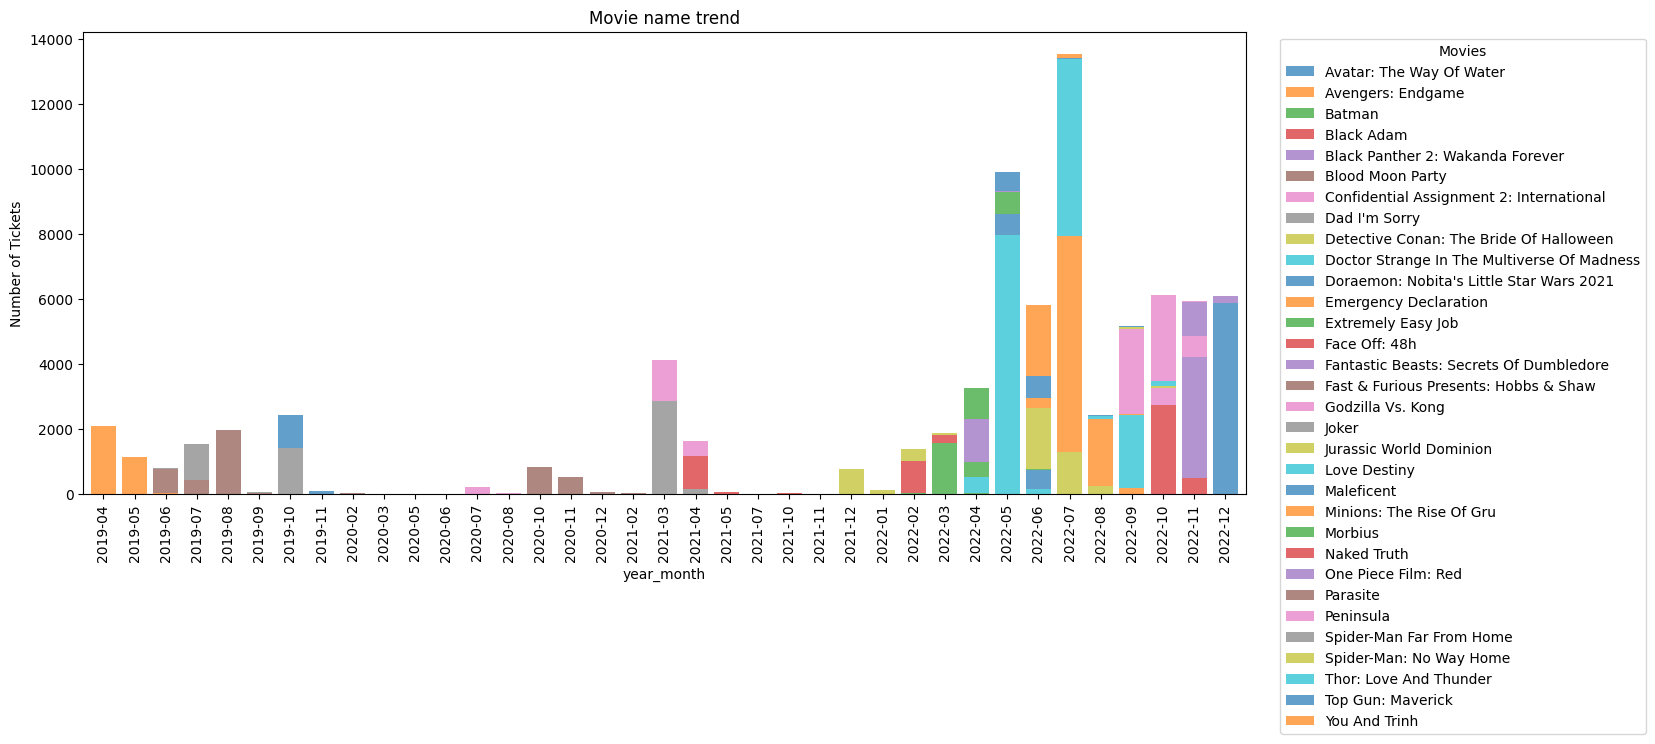

In [ ]:
#Biểu đồ cột chồng
ax = df_movie_time_pivot.plot(x = 'year_month', kind='bar', stacked=True, figsize=(15, 6), width=0.8, alpha = 0.7)

# Set the title and labels
ax.set_title('Movie name trend')
ax.set_ylabel('Number of Tickets')
plt.legend(title='Movies', loc='upper right', bbox_to_anchor=(1.35, 1))
plt.show()

## **3.4 Customer value dimension**

>- **Mục tiêu: Phân tích các chỉ số về giá trị mà khách hàng mang lại**
>>- **Frequecy**: count, day, month
>>- **Monetary**: total_moeny, total_discount
>>- **Success_rate**: number_success / total
>>- **Promotion_rate**: number_promotion / total_sucess
>>- **Discount_rate** = sum_discount / sum_money

In [ ]:
df_join_all.head(5)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,model,platform,description,error_group,age_days,age,month,year_month,name_day,hour,os_version,type
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,"iPhone13,1",mobile,Order successful,unknow,13065,35,7,2022-07,Friday,17,ios,promotion
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,browser,website,Order successful,unknow,12231,33,7,2022-07,Friday,20,browser,promotion
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknow,unknow,mobile,Order successful,unknow,12983,35,7,2022-07,Saturday,11,unknown,non-promotion
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,devicemodel,mobile,Order successful,unknow,9956,27,7,2022-07,Monday,22,unknown,promotion
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,devicemodel,mobile,Order successful,unknow,13223,36,7,2022-07,Sunday,18,unknown,promotion


In [ ]:
# Tính tất cả các chỉ số trên:
#Tính các chỉ số cho những vé thanh toán thành công:
def calculate_n_promotion(x):
  return ( x == 'promotion').sum()
df_success_metric = (
    df_join_all[df_join_all['status_id'] == 1]
    .assign(date = pd.to_datetime(df_join_all['time']).dt.date)
    .groupby('customer_id')
    .agg(
        n_success = ('ticket_id', 'count'),
        s_money = ('original_price', 'sum'),
        s_discount = ('discount_value', 'sum'),
        n_days = ('date', 'nunique'),
        n_months = ('year_month', 'nunique'),
        n_promotions = ('type', calculate_n_promotion)
    )
    .reset_index()
)


In [ ]:
# Tính các chỉ số giao dịch lỗi
def calculate_n_failed(x):
  return ( x == 'failed').sum()
df_failed_metric = (
    df_join_all
    .groupby('customer_id')
    .agg(
        n_total = ('ticket_id', 'count'),
        n_failed = ('status_id', calculate_n_failed)
    )
    .reset_index()
)


In [ ]:
df_success_metric.head(5)

,customer_id,n_success,s_money,s_discount,n_days,n_months,n_promotions
0,100001,1,7.42,2.06,1,1,1
1,100003,6,60.95,2.56,6,6,1
2,100004,1,32.25,0.00,1,1,0
3,100005,1,9.49,2.06,1,1,1
4,100006,1,12.37,0.00,1,1,0


In [ ]:
df_failed_metric.head(5)

,customer_id,n_total,n_failed
0,100001,1,0
1,100003,6,0
2,100004,1,0
3,100005,1,0
4,100006,1,0


In [ ]:
df_failed_metric.count()

,0
customer_id,119477
n_total,119477
n_failed,119477


In [ ]:
# join 2 bảng lại
df_customer_value = pd.merge(df_failed_metric, df_success_metric, on='customer_id', how='left').fillna(0)

In [ ]:
df_customer_value.count()

,0
customer_id,119477
n_total,119477
n_failed,119477
n_success,119477
s_money,119477
s_discount,119477
n_days,119477
n_months,119477
n_promotions,119477


In [ ]:
df_customer_value.head(5)

,customer_id,n_total,n_failed,n_success,s_money,s_discount,n_days,n_months,n_promotions
0,100001,1,0,1.0,7.42,2.06,1.0,1.0,1.0
1,100003,6,0,6.0,60.95,2.56,6.0,6.0,1.0
2,100004,1,0,1.0,32.25,0.00,1.0,1.0,0.0
3,100005,1,0,1.0,9.49,2.06,1.0,1.0,1.0
4,100006,1,0,1.0,12.37,0.00,1.0,1.0,0.0


In [ ]:
df_customer_value['success_rate'] = df_customer_value['n_success'] / df_customer_value['n_total']
df_customer_value['promotion_rate'] = df_customer_value['n_promotions'] / df_customer_value['n_success']
df_customer_value['discount_rate'] = df_customer_value['s_discount'] / df_customer_value['s_money']

In [ ]:
df_customer_value.head(5)

,customer_id,n_total,n_failed,n_success,s_money,s_discount,n_days,n_months,n_promotions,success_rate,promotion_rate,discount_rate
0,100001,1,0,1.0,7.42,2.06,1.0,1.0,1.0,1.0,1.000000,0.277628
1,100003,6,0,6.0,60.95,2.56,6.0,6.0,1.0,1.0,0.166667,0.042002
2,100004,1,0,1.0,32.25,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000
3,100005,1,0,1.0,9.49,2.06,1.0,1.0,1.0,1.0,1.000000,0.217071
4,100006,1,0,1.0,12.37,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000


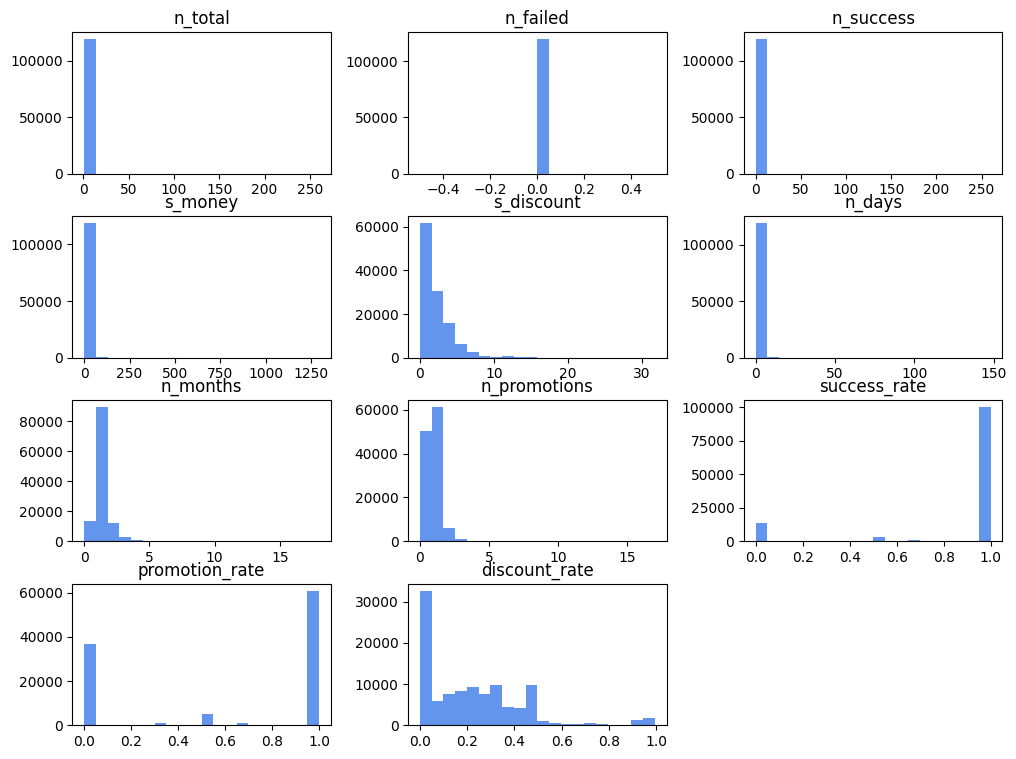

In [ ]:
#Visualize tất cả các chỉ số bằng histogram:
df_customer_value.iloc[:, 1:].hist(figsize = (12, 9), grid = False, color= 'cornflowerblue', bins = 20)
plt.show()

>- **Notes**
>>- **n_total** : Hầu hết KH mua vé rất ít (1-2 vé) nhưng có top những người mua rất nhiều --> check những người này
>>- **success_rate** : Có khoản 10% giao dịch SR = 0% --> Bị lỗi gì mà fail không tham gia tiếp?
>>- **promotion_rate** : Có hơn 60000 KH chỉ tham gia promotion (rate = 100%) --> chương trình promo nào chỉ mang KH tới mà k giữ được lại?
>>- **n_promotion**: 60000 KH chỉ hưởng promotion 1 lần ( có liên quan gì đến nhóm ở promotion_rate = 100% )?


### **Frequent & anomaly behavior**

In [ ]:
df_customer_value['n_order_dis'] = df_customer_value['n_success'].apply(
    lambda x: 'more than 10' if x >= 10 else str(x)
)


In [ ]:
df_customer_value.head(5)

,customer_id,n_total,n_failed,n_success,s_money,s_discount,n_days,n_months,n_promotions,success_rate,promotion_rate,discount_rate,n_order_dis
0,100001,1,0,1.0,7.42,2.06,1.0,1.0,1.0,1.0,1.000000,0.277628,1.0
1,100003,6,0,6.0,60.95,2.56,6.0,6.0,1.0,1.0,0.166667,0.042002,6.0
2,100004,1,0,1.0,32.25,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000,1.0
3,100005,1,0,1.0,9.49,2.06,1.0,1.0,1.0,1.0,1.000000,0.217071,1.0
4,100006,1,0,1.0,12.37,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000,1.0


In [ ]:
df_n_dis = df_customer_value.groupby('n_order_dis').agg(total_customer = ('customer_id', 'count')).reset_index()

In [ ]:
df_n_dis.head(12)

,n_order_dis,total_customer
0,0.0,13701
1,1.0,87921
2,2.0,12902
3,3.0,3145
4,4.0,1017
5,5.0,380
6,6.0,168
7,7.0,92
8,8.0,47
9,9.0,30


Text(0.5, 1.0, '#customer of each group')

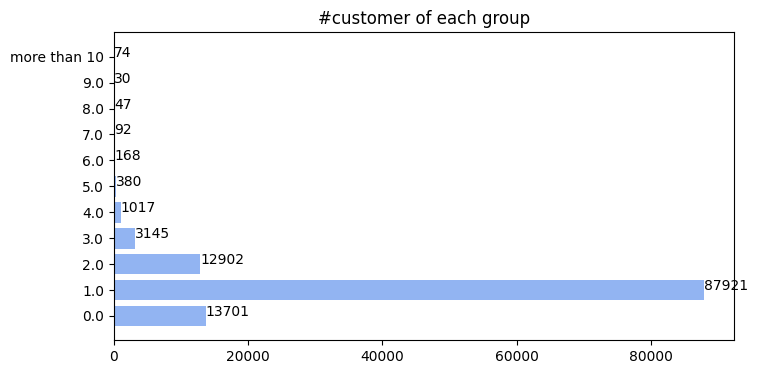

In [ ]:
# Biểu đồ cột ngang :
plt.figure(figsize=(8, 4))

plt.barh(
    df_n_dis['n_order_dis'], df_n_dis['total_customer'], color = 'cornflowerblue', alpha = 0.7
)

for index,value in enumerate(df_n_dis['total_customer']):
    plt.text(value,index,str(value))

plt.title('#customer of each group')

In [ ]:
df_customer_value.count()

,0
customer_id,119477
n_total,119477
n_failed,119477
n_success,119477
s_money,119477
s_discount,119477
n_days,119477
n_months,119477
n_promotions,119477
success_rate,119477


In [ ]:
#Nếu họ mua dồn vào 1 lúc --> bất thường
#Nếu mua dàn trải: --> bất thường


In [ ]:
df_customer_value.sort_values(by='n_success', ascending=False).head(20)

,customer_id,n_total,n_failed,n_success,s_money,s_discount,n_days,n_months,n_promotions,success_rate,promotion_rate,discount_rate,n_order_dis
2686,102948,260,0,260.0,1291.25,3.38,148.0,18.0,1.0,1.000000,0.003846,0.002618,more than 10
48948,153588,108,0,107.0,434.59,0.00,77.0,14.0,0.0,0.990741,0.000000,0.000000,more than 10
10604,111644,104,0,104.0,581.70,18.52,85.0,18.0,9.0,1.000000,0.086538,0.031838,more than 10
15783,117362,104,0,103.0,744.86,8.62,79.0,15.0,6.0,0.990385,0.058252,0.011573,more than 10
16687,118349,83,0,80.0,344.56,4.21,62.0,17.0,1.0,0.963855,0.012500,0.012218,more than 10
20907,122962,77,0,76.0,447.00,1.86,45.0,9.0,3.0,0.987013,0.039474,0.004161,more than 10
72718,179471,69,0,68.0,375.91,7.14,51.0,9.0,4.0,0.985507,0.058824,0.018994,more than 10
62432,168132,69,0,66.0,249.03,0.00,59.0,14.0,0.0,0.956522,0.000000,0.000000,more than 10
111563,222641,51,0,51.0,240.84,2.31,41.0,11.0,3.0,1.000000,0.058824,0.009591,more than 10
53097,158089,53,0,51.0,245.14,1.69,40.0,14.0,2.0,0.962264,0.039216,0.006894,more than 10


In [ ]:
list_customer_massive = list(df_customer_value[df_customer_value['n_success'] >= 30]['customer_id'].unique())


In [ ]:
list_customer_massive

[102948,
 103035,
 103347,
 108110,
 108162,
 108729,
 111644,
 114205,
 117140,
 117362,
 117475,
 118349,
 122962,
 131905,
 153124,
 153588,
 158089,
 168132,
 179471,
 222641,
 226527,
 226886]

In [ ]:
df_customer_massive_pivot = (
    df_join_all[(df_join_all['customer_id'].isin(list_customer_massive)) & (df_join_all['status_id'] == 1)]
    .pivot_table(index = 'year_month', columns = 'customer_id', values = 'ticket_id', aggfunc = 'count')
    .reset_index()

)

In [ ]:
df_customer_massive_pivot

customer_id,year_month,102948,103035,103347,108110,108162,108729,111644,114205,117140,117362,117475,118349,122962,131905,153124,153588,158089,168132,179471,222641,226527,226886
0,2019-01,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-04,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
4,2019-05,NaN,2.0,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,2.0,3.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN
5,2019-06,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,1.0,NaN,1.0,NaN,NaN,1.0,7.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
6,2019-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
7,2019-08,NaN,3.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.0,7.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
8,2019-09,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
9,2019-10,NaN,4.0,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN


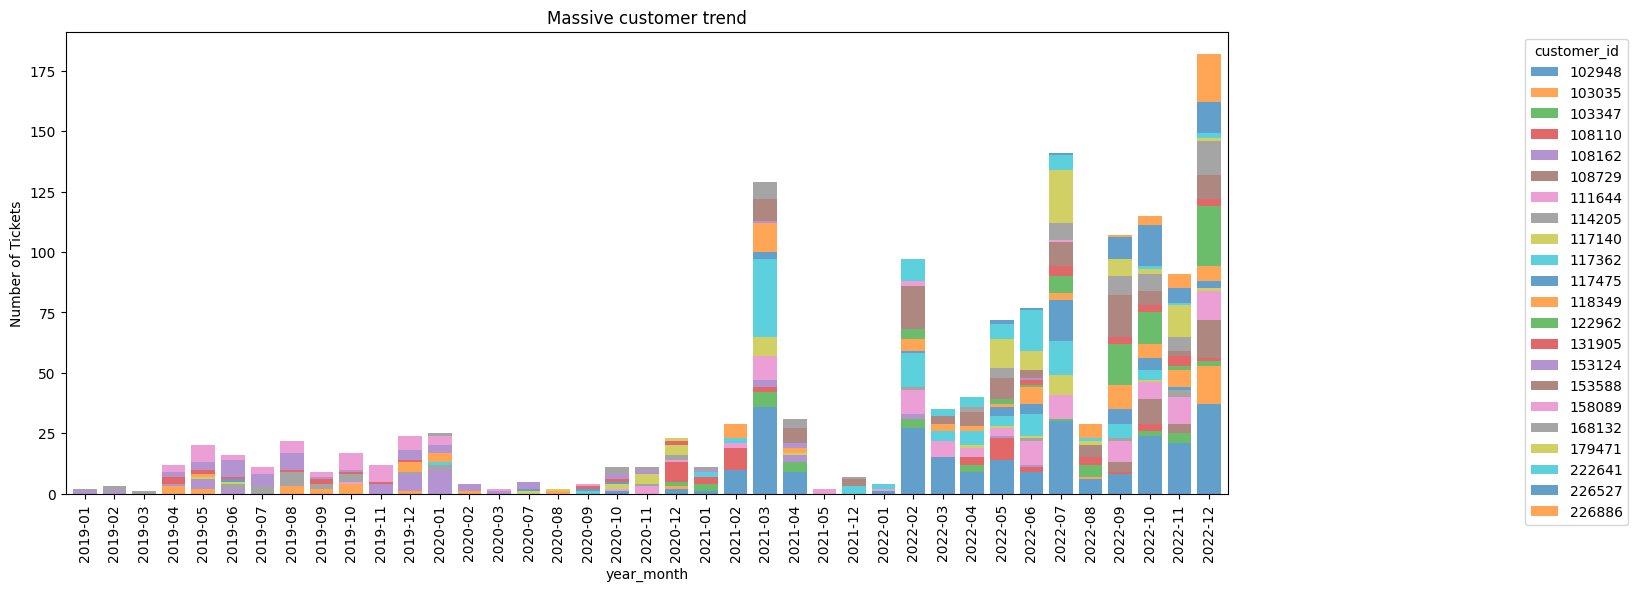

In [ ]:
#Biểu đồ cột chồng
ax = df_customer_massive_pivot.plot(x = 'year_month', kind='bar', stacked=True, figsize=(15, 6), width=0.8, alpha = 0.7)

# Set the title and labels
ax.set_title('Massive customer trend')
ax.set_ylabel('Number of Tickets')
plt.legend(title='customer_id', loc='upper right', bbox_to_anchor=(1.35, 1))
plt.show()

>- **Notes**
>>- Nhóm KH mua vé > 30 lượt phân bố dàn trải --> không có hiện tượng spam vé, mua đi bán lại
>>- Chưa có gì bất thường

### **Massive promotion**

In [ ]:
df_customer_value.head(5)

,customer_id,n_total,n_failed,n_success,s_money,s_discount,n_days,n_months,n_promotions,success_rate,promotion_rate,discount_rate,n_order_dis
0,100001,1,0,1.0,7.42,2.06,1.0,1.0,1.0,1.0,1.000000,0.277628,1.0
1,100003,6,0,6.0,60.95,2.56,6.0,6.0,1.0,1.0,0.166667,0.042002,6.0
2,100004,1,0,1.0,32.25,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000,1.0
3,100005,1,0,1.0,9.49,2.06,1.0,1.0,1.0,1.0,1.000000,0.217071,1.0
4,100006,1,0,1.0,12.37,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000,1.0


In [ ]:
df_customer_value['n_promo_dis'] = df_customer_value['n_promotions'].apply(lambda x: 'more than 10' if x >= 10 else str(x))

In [ ]:
df_promo_dis = df_customer_value.groupby('n_promo_dis').agg(total_customer = ('customer_id', 'count')).reset_index()

In [ ]:
df_promo_dis.head(10)

,n_promo_dis,total_customer
0,0.0,50498
1,1.0,61334
2,2.0,6264
3,3.0,1042
4,4.0,230
5,5.0,74
6,6.0,19
7,7.0,10
8,8.0,2
9,9.0,2


Text(0.5, 1.0, '#customer of each group')

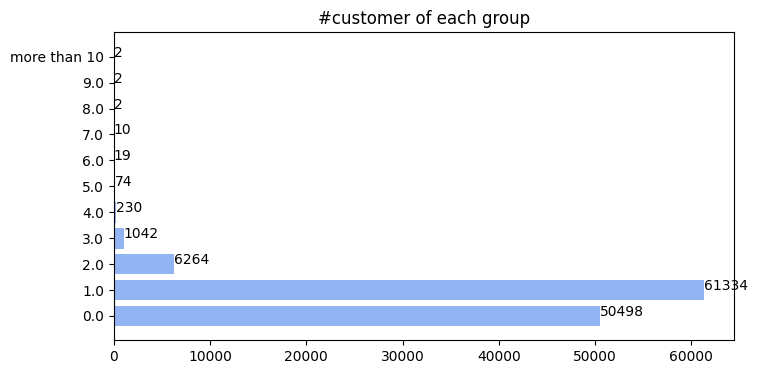

In [ ]:
# Biểu đồ cột ngang :
plt.figure(figsize=(8, 4))

plt.barh(
    df_promo_dis['n_promo_dis'], df_promo_dis['total_customer'], color = 'cornflowerblue', alpha = 0.7
)

for index,value in enumerate(df_promo_dis['total_customer']):
    plt.text(value,index,str(value))

plt.title('#customer of each group')

In [ ]:
70/120

0.5833333333333334

>> - Có gần 60% KH có join các chương trình khuyến mãi
>> - Trong đó 90% là chỉ hưởng KM 1 lần duy nhất
>>>- 1. KH đến 1 lần rồi thôi
>>>- 2. Các CT promotion chỉ cho 1 người dùng 1 lần ( dành cho new customers ) ??? ---> làm rõ với team product hoặc MKT


In [ ]:
### Vậy loại KM mà KH đang dùng là gì ?

In [ ]:
df_join_all.head(5)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,model,platform,description,error_group,age_days,age,month,year_month,name_day,hour,os_version,type
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,"iPhone13,1",mobile,Order successful,unknow,13065,35,7,2022-07,Friday,17,ios,promotion
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,browser,website,Order successful,unknow,12231,33,7,2022-07,Friday,20,browser,promotion
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknow,unknow,mobile,Order successful,unknow,12983,35,7,2022-07,Saturday,11,unknown,non-promotion
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,devicemodel,mobile,Order successful,unknow,9956,27,7,2022-07,Monday,22,unknown,promotion
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,devicemodel,mobile,Order successful,unknow,13223,36,7,2022-07,Sunday,18,unknown,promotion


In [ ]:
#Đánh giá loại KM mà KH dùng:
df_type_group = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['type'] == 'promotion')] \
    .groupby('campaign_type') \
    .agg(total=('ticket_id', 'count')) \
    .reset_index()
)

In [ ]:
df_type_group

,campaign_type,total
0,direct discount,68449
1,reward point,3150
2,voucher,6924


In [ ]:
## Tính tỉ lệ loại KM chi tiết cho từng nhóm KH ( nhóm có 1KM, 2KM, 3KM, ...)

In [ ]:
df_n_success = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['type'] == 'promotion')]
    .groupby('customer_id')
    .agg(n_promotions = ('ticket_id', 'count'))
)


In [ ]:
df_n_pivot = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['type'] == 'promotion')]
    .pivot_table(index = 'customer_id', columns = 'campaign_type', values = 'ticket_id', aggfunc = 'count')
    .reset_index()
)


In [ ]:
df_n_pivot

campaign_type,customer_id,direct discount,reward point,voucher
0,100001,NaN,NaN,1.0
1,100003,1.0,NaN,NaN
2,100005,NaN,NaN,1.0
3,100007,1.0,NaN,NaN
4,100009,7.0,NaN,NaN
...,...,...,...,...
68974,231393,NaN,NaN,1.0
68975,231395,1.0,NaN,NaN
68976,231397,NaN,NaN,1.0
68977,231398,NaN,NaN,1.0


In [ ]:
df_n_join = (
    pd.merge(df_n_success, df_n_pivot, how ='inner', on = 'customer_id')
    .groupby('n_promotions').agg(n_cus = ('customer_id', 'count'),
                                 n_voucher = ('voucher', 'sum'),
                                 n_d_discount = ('direct discount', 'sum'),
                                 n_reward_point = ('reward point', 'sum')).reset_index()
)

In [ ]:
df_n_join

,n_promotions,n_cus,n_voucher,n_d_discount,n_reward_point
0,1,61334,5358.0,53098.0,2878.0
1,2,6264,1091.0,11222.0,215.0
2,3,1042,293.0,2788.0,45.0
3,4,230,87.0,827.0,6.0
4,5,74,43.0,323.0,4.0
5,6,19,12.0,102.0,0.0
6,7,10,14.0,54.0,2.0
7,8,2,2.0,14.0,0.0
8,9,2,6.0,12.0,0.0
9,10,1,1.0,9.0,0.0


In [ ]:
df_n_join['total'] = df_n_join['n_voucher'] + df_n_join['n_d_discount'] + df_n_join['n_reward_point']

In [ ]:
df_n_join

,n_promotions,n_cus,n_voucher,n_d_discount,n_reward_point,total
0,1,61334,5358.0,53098.0,2878.0,61334.0
1,2,6264,1091.0,11222.0,215.0,12528.0
2,3,1042,293.0,2788.0,45.0,3126.0
3,4,230,87.0,827.0,6.0,920.0
4,5,74,43.0,323.0,4.0,370.0
5,6,19,12.0,102.0,0.0,114.0
6,7,10,14.0,54.0,2.0,70.0
7,8,2,2.0,14.0,0.0,16.0
8,9,2,6.0,12.0,0.0,18.0
9,10,1,1.0,9.0,0.0,10.0


In [ ]:
for i in df_n_join.columns[2:5]:
  df_n_join[i+'_pct'] = df_n_join[i] / df_n_join['total']

In [ ]:
df_n_join

,n_promotions,n_cus,n_voucher,n_d_discount,n_reward_point,total,n_voucher_pct,n_d_discount_pct,n_reward_point_pct
0,1,61334,5358.0,53098.0,2878.0,61334.0,0.087358,0.865719,0.046923
1,2,6264,1091.0,11222.0,215.0,12528.0,0.087085,0.895754,0.017162
2,3,1042,293.0,2788.0,45.0,3126.0,0.093730,0.891875,0.014395
3,4,230,87.0,827.0,6.0,920.0,0.094565,0.898913,0.006522
4,5,74,43.0,323.0,4.0,370.0,0.116216,0.872973,0.010811
5,6,19,12.0,102.0,0.0,114.0,0.105263,0.894737,0.000000
6,7,10,14.0,54.0,2.0,70.0,0.200000,0.771429,0.028571
7,8,2,2.0,14.0,0.0,16.0,0.125000,0.875000,0.000000
8,9,2,6.0,12.0,0.0,18.0,0.333333,0.666667,0.000000
9,10,1,1.0,9.0,0.0,10.0,0.100000,0.900000,0.000000


In [ ]:
format_dict = {'total' : '{:.0f}', 'n_voucher_pct' : '{:,.0%}', 'n_d_discount_pct' : '{:,.0%}', 'n_reward_point_pct' : '{:,.0%}'}


In [ ]:
# heat map cho table:
(
    df_n_join
    .drop(columns = ['n_voucher', 'n_d_discount', 'n_reward_point'])
    .style.format(format_dict)
    .background_gradient(subset = ['n_voucher_pct', 'n_d_discount_pct', 'n_reward_point_pct'], cmap = 'PuBu')
    .background_gradient(subset = ['total'], cmap = 'YlGn')
)


,n_promotions,n_cus,total,n_voucher_pct,n_d_discount_pct,n_reward_point_pct
0,1,61334,61334,9%,87%,5%
1,2,6264,12528,9%,90%,2%
2,3,1042,3126,9%,89%,1%
3,4,230,920,9%,90%,1%
4,5,74,370,12%,87%,1%
5,6,19,114,11%,89%,0%
6,7,10,70,20%,77%,3%
7,8,2,16,12%,88%,0%
8,9,2,18,33%,67%,0%
9,10,1,10,10%,90%,0%


> **Notes**
>> - ~90% KH chọn tham gia các campaign Direct discount
>> - Đánh giá thêm về Rentention của KH --> Quay trở lại? --> Hiệu quả của MKT?

## **3.5 Customer retention -- Cohort Analysis**
>>- Đánh giá tỉ lệ giữ chân khách hàng
>>- Tìm ra các yếu tố ảnh hưởng đến retention

In [ ]:
# 1. Dựa vào thời điểm chuyển đổi KH: lần đầu thanh toán, mua hàng, cài app

In [ ]:
from operator import attrgetter
import matplotlib.colors as mcolors
import seaborn as sns


In [ ]:
#Bước 1: Tính toán các thông tin : cohorrt (first month), current_month, subsequent_month
df_selected_time = df_join_all[(df_join_all['time'] < '2020-01-01') & (df_join_all['status_id'] == 1)]
df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
df_selected_time['subsequent_month'] = (df_selected_time['current_month'] - df_selected_time['first_month']).apply(attrgetter('n'))


<ipython-input-180-93511803bf76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
<ipython-input-180-93511803bf76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
<ipython-input-180-93511803bf76>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [ ]:
df_selected_time.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,model,platform,description,error_group,age_days,age,month,year_month,name_day,hour,os_version,type,first_month,current_month,subsequent_month
11327,9e3e753f70aede1c6dcc577ce563eef1,100009,credit card,74.0,3cac5d2e2eb76525aecea5c2ab46b3d9,9.07,2.56,6.51,2019-11-09 16:19:41.008,1,25680,Doctor Sleep,Male,1989-02-25,direct discount,"iPhone10,2",mobile,Order successful,unknow,13065,35,11,2019-11,Saturday,16,ios,promotion,2019-04,2019-11,7
11328,74a0ac9b7c60d2e7d3664686c3342c00,101892,money in app,79.0,fe9a5c91e224f005a8be1c62923548d8,9.07,2.56,6.51,2019-11-16 16:35:02.953,1,25690,Doctor Sleep,Female,1986-10-19,direct discount,Samsung SM-N935F,mobile,Order successful,unknow,13925,38,11,2019-11,Saturday,16,android & other,promotion,2019-08,2019-11,3
11329,4a653fb01188cfaefe7e3731de2648de,105574,credit card,43.0,99b47df3cdeecb3dec4da6c18b916dd0,9.07,2.56,6.51,2019-11-09 18:10:13.461,1,25680,Doctor Sleep,Male,1935-01-01,direct discount,"iPhone9,2",mobile,Order successful,unknow,32844,89,11,2019-11,Saturday,18,ios,promotion,2019-11,2019-11,0
11332,f075d68aa14bc424e3d9ca7904f900a5,111681,credit card,123.0,a43fb711603d5f2be7001397d280e413,8.66,2.10,6.56,2019-11-16 22:02:42.851,1,25690,Doctor Sleep,Not verify,1970-01-01,direct discount,HTC HTC_U-3u,mobile,Order successful,unknow,20060,54,11,2019-11,Saturday,22,android & other,promotion,2019-11,2019-11,0
11333,747efd023e43617ca96e127c8af625b8,116896,money in app,72.0,ac219f148fe5a9653b48ce64b41625b7,6.19,0.00,6.19,2019-11-13 17:32:32.892,1,0,Doctor Sleep,Male,1990-08-30,unknow,OnePlus HD1900,mobile,Order successful,unknow,12514,34,11,2019-11,Wednesday,17,android & other,non-promotion,2019-11,2019-11,0


In [ ]:
#bước 2: Group by
df_cohor = (
    df_selected_time
    .groupby(['first_month', 'current_month', 'subsequent_month'])
    .agg(n_customers = ('customer_id', 'nunique'))
    .reset_index(drop=False)
)

In [ ]:
df_cohor.head(5)

,first_month,current_month,subsequent_month,n_customers
0,2019-01,2019-01,0,1348
1,2019-01,2019-02,1,50
2,2019-01,2019-03,2,35
3,2019-01,2019-04,3,26
4,2019-01,2019-05,4,25


In [ ]:
df_cohort_pivot = (
    df_cohor
    .pivot_table(index = 'first_month', columns = 'subsequent_month', values='n_customers')
)


In [ ]:
# chuyển sang %
cohort_size = df_cohort_pivot.iloc[:,0]
retention_matrix = df_cohort_pivot.divide(cohort_size, axis = 0)

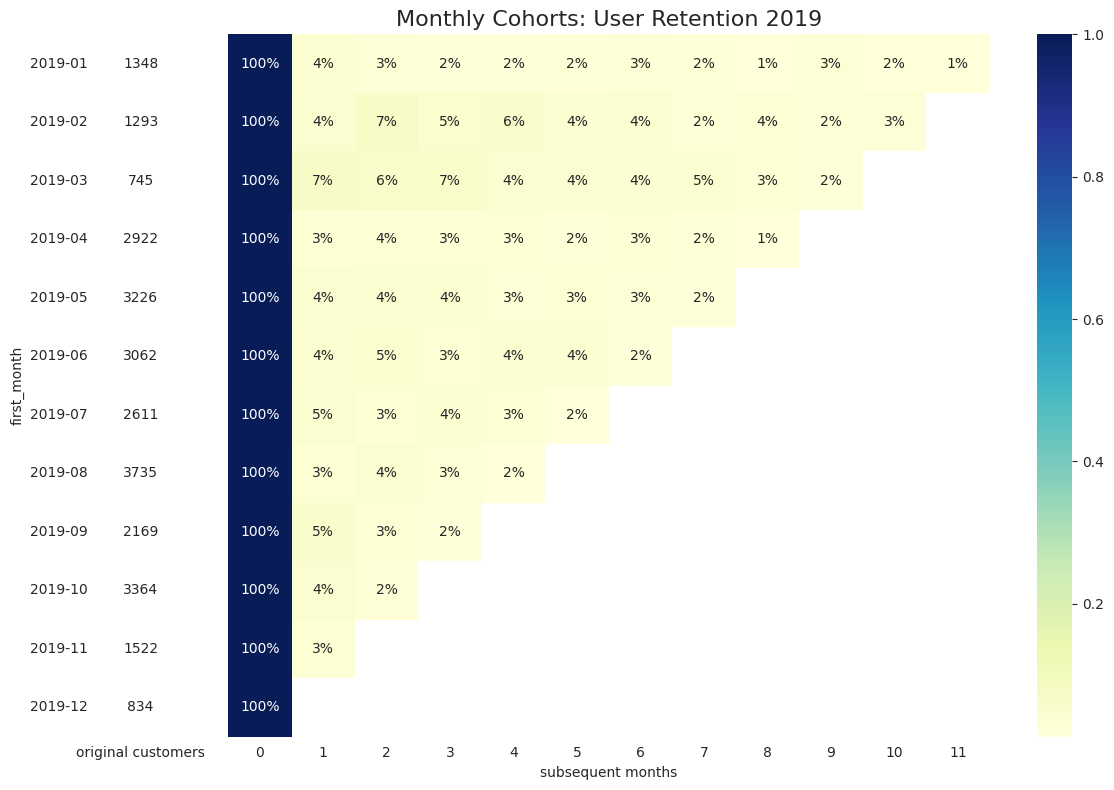

In [ ]:
# Vẽ biểu đồ cohort
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='YlGnBu',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention 2019', fontsize=16)
    ax[1].set(xlabel='subsequent months',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'original customers'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                alpha=0.5,
                ax=ax[0])

    fig.tight_layout()

>- **Notes**
>>- Retention 2019 và 2022 không có nhiều sự thay đổi, do thị trường phim mới hồi phục nên chưa có nhiều thời gian để công ty cải thiện
>>- Lý do retention thấp mặc dù rõ ràng 60-65% traffice có chạy promotion trong năm 2022?

###  **Compare: Retention of promotion customer & organic customers**

In [ ]:
# By payment method
df_pie_promo = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['time'] > '2022-01-01')]
    .groupby('type')
    .agg(total_ticket = ('customer_id', 'nunique'))
    .sort_values(by='total_ticket', ascending=True)
    .reset_index()
)


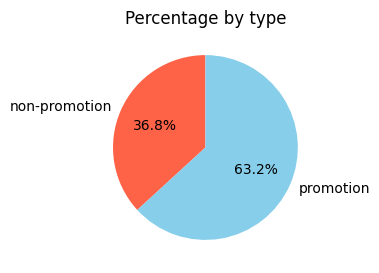

In [ ]:
#Pie
plt.figure(figsize=(6, 3))
plt.pie(df_pie_promo['total_ticket'],
        labels=df_pie_promo['type'],
        autopct='%1.1f%%',
        colors=['tomato', 'skyblue'], # Directly assign colors based on the order of labels
        startangle=90)
plt.title('Percentage by type')
plt.show()

In [ ]:
#Phân biệt nhóm người promotion và organic: dựa vào vé đầu tiên (first order)



In [ ]:
df_data_check = (
    df_join_all[(df_join_all['status_id'] == 1) &  (df_join_all['time'] > '2022-01-01')][['customer_id', 'ticket_id', 'time', 'type']]
    .sort_values(by=['customer_id', 'time'])
    .reset_index(drop=True)
)


In [ ]:
df_data_check.head(10)

,customer_id,ticket_id,time,type
0,100003,34c4764b4afa000af4c33a525f20eace,2022-05-22 12:52:12.105,non-promotion
1,100004,1c4aa39842bfc83dbb5856c25a33d9cb,2022-12-20 06:26:21.373,non-promotion
2,100007,5565ba5e22475c7cce298a2bea470428,2022-03-21 17:57:18.460,promotion
3,100009,4f5200dcdcf2396b8d50ff84bf423f32,2022-07-08 17:46:36.145,promotion
4,100009,0724203b5146b0ebae6e3678ed7eccde,2022-12-24 09:32:45.477,promotion
5,100013,f95441286dcfa045f61a5760662616e1,2022-05-05 12:22:44.587,non-promotion
6,100018,1e40fb2d0f6264ed3127f79b1a12c9c9,2022-09-07 21:13:17.896,non-promotion
7,100018,9a959ff1649950949ff2c0aff4b62205,2022-11-19 16:25:43.981,promotion
8,100020,af02fc96a6703af7d93162d9f8c61dba,2022-05-28 19:09:37.936,promotion
9,100023,5ed44ff62214268ffcb14d4ea78b04d8,2022-05-16 08:45:42.397,promotion


In [ ]:
#Đánh số thứ tự của KH:
df_data_check['row_number'] = df_data_check.groupby('customer_id').cumcount() + 1

In [ ]:
#Số KH có first payment là promotion
df_data_check[(df_data_check['type'] == 'promotion') & (df_data_check['row_number'] == 1)]['customer_id'].nunique()

46189

In [ ]:
46189/ 47507

0.9722567200623066

In [ ]:
#Có 97% KH đến từ pormotion trong nhóm KH có tham gia promotion -> Retention là bao nhiêu?

In [ ]:
df_first_promo_list = df_data_check[(df_data_check['type'] == 'promotion') & (df_data_check['row_number'] == 1)]['customer_id']
df_first_promo_list.drop_duplicates(inplace = True)
df_first_promo_check = pd.merge(df_data_check, df_first_promo_list, how = 'inner', on = 'customer_id')

<ipython-input-196-7f31cd81bedb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_promo_list.drop_duplicates(inplace = True)


In [ ]:
(
    df_first_promo_check[(df_first_promo_check['row_number'] == 2)]['customer_id'].nunique()
) / (
    df_first_promo_check['customer_id'].nunique()
)

0.1308969668102795

In [ ]:
#13% KH quay lại kể từ lần đầu tham gia promotion( tỷ lệ chuyển đổi, giữ chân = 13%  )
# --> Nhóm organic có khác biệt không?

In [ ]:
list_first_non_promo = df_data_check[(df_data_check['type'] != 'promotion') & (df_data_check['row_number'] == 1)]['customer_id']
list_first_non_promo.drop_duplicates(inplace = True)
df_first_non_promo_check = pd.merge(df_data_check, list_first_non_promo, how = 'inner', on = 'customer_id')
(
    df_first_non_promo_check[(df_first_non_promo_check['row_number'] == 2)]['customer_id'].nunique()
) / (
    df_first_non_promo_check['customer_id'].nunique()
)

<ipython-input-199-788879e88c66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_first_non_promo.drop_duplicates(inplace = True)


0.12195316551641601

In [ ]:
#Nhóm KH first_time là organic --> tỉ lệ quay lại = 12%

>- **Notes:**
>>- **97%** promotion 2022 là dành cho NEW CUSTOMERS, tuy nhiên
>>- Chỉ có **13%** quay trở lại lần sau, trong khi tỉ lệ này của nhms organic là **12%**
--> Công ty đang chú trọng accquire new customer nhưng chưa đẩy mạnh việc giữ cchana và duy trì lượng KH cũ

## **3.6 Payment success rate**

### **Overview**

In [ ]:
def calculate_n_success(x):
    return (x == 1).sum()

In [ ]:
df_sr = (
    df_join_all
    .groupby('year_month')
    .agg(n_ords = ('ticket_id', 'count'), # total ticket
         n_success = ('status_id', calculate_n_success)) # success ticket
    .assign(success_rate=lambda x: (x['n_success'] / x['n_ords']) * 100) # tạo thêm 1 column tính SR
    .reset_index()
)

Text(0.5, 1.0, 'Payment success rate by months')

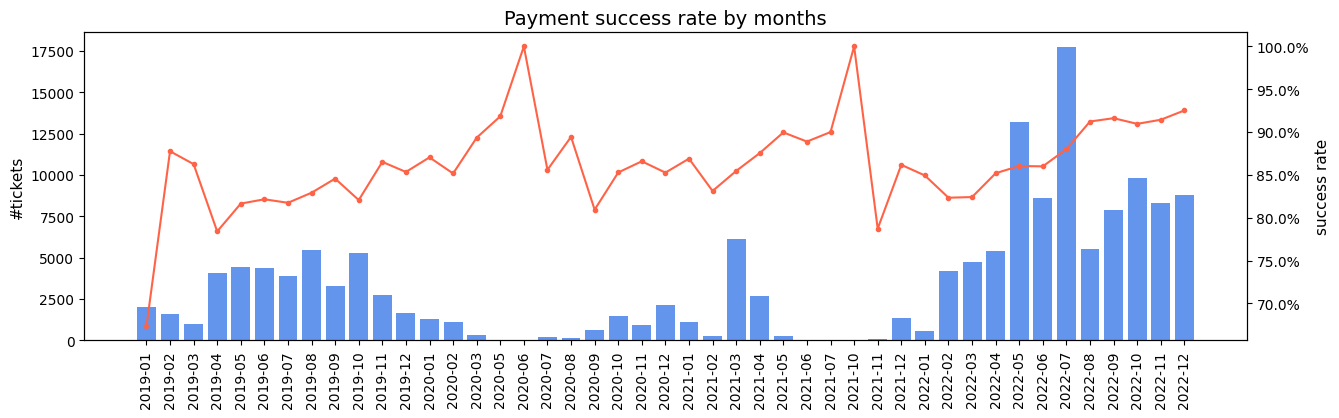

In [ ]:

# Vẽ biểu đồ cột và đường

from matplotlib.ticker import PercentFormatter

fig, ax1 = plt.subplots(figsize=(15,4))

ax1.bar(df_sr['year_month'], df_sr['n_ords'], color="cornflowerblue")
plt.ylabel('#tickets', fontsize=11)
plt.xticks(rotation='vertical')

ax2 = ax1.twinx()
ax2.plot(df_sr['year_month'], df_sr['success_rate'], color="tomato", marker="o", ms=3)
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.ylabel('success rate', fontsize=11)
plt.title('Payment success rate by months', fontsize=14)


### **Error trends**

In [ ]:
df_join_all.head(5)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,model,platform,description,error_group,age_days,age,month,year_month,name_day,hour,os_version,type
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,"iPhone13,1",mobile,Order successful,unknow,13065,35,7,2022-07,Friday,17,ios,promotion
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,browser,website,Order successful,unknow,12231,33,7,2022-07,Friday,20,browser,promotion
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknow,unknow,mobile,Order successful,unknow,12983,35,7,2022-07,Saturday,11,unknown,non-promotion
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,devicemodel,mobile,Order successful,unknow,9956,27,7,2022-07,Monday,22,unknown,promotion
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,devicemodel,mobile,Order successful,unknow,13223,36,7,2022-07,Sunday,18,unknown,promotion


In [ ]:
#Phân bố nhóm lỗi:
df_error_group = (
    df_join_all[df_join_all['status_id'] != 1]
.groupby(['year_month', 'error_group'])
.agg(n_ords = ('ticket_id', 'count'))
.sort_values(by= 'year_month', ascending = True)
.reset_index()
    )

In [ ]:
df_error_group

,year_month,error_group,n_ords
0,2019-01,customer,291
1,2019-01,external,369
2,2019-02,customer,66
3,2019-02,external,133
4,2019-03,customer,44
...,...,...,...
100,2022-11,customer,146
101,2022-11,internal,1
102,2022-12,external,535
103,2022-12,customer,113


In [ ]:
df_error_group['error_group'].unique()

array(['customer', 'external', 'internal'], dtype=object)

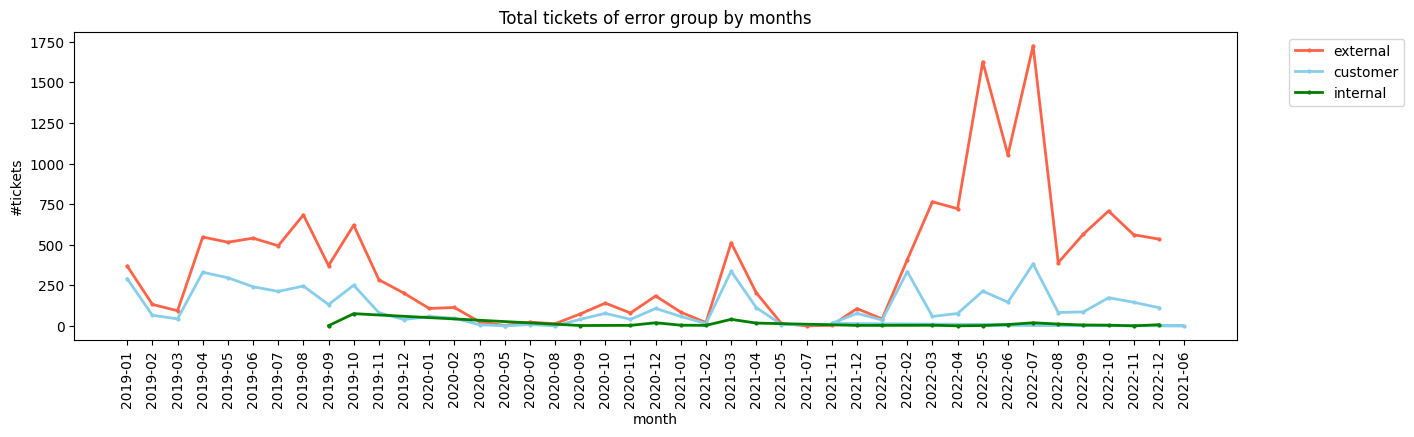

In [ ]:
# Phân bố nhóm lỗi
error_color_pairs = [('external', 'tomato'), ('customer', 'skyblue'), ('internal', 'green')]
plt.figure(figsize=(15, 4))
for error, color in error_color_pairs:
  df_err_line = df_error_group[df_error_group['error_group'] == error]
  plt.plot(df_err_line['year_month'], df_err_line['n_ords'], marker='o', label = error, color = color, linewidth = 2, markersize= 2)
plt.title("Total tickets of error group by months")
plt.xlabel('month')
plt.ylabel('#tickets')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#Nhóm lỗi extranal tăng đột biến trong 2022???

In [ ]:
#Phân bố mã lỗi:
df_error = (
    df_join_all[df_join_all['status_id'] !=1]
    .groupby(['year_month', 'description'])
    .agg(n_ords = ('ticket_id', 'count'))
    .sort_values(by = 'year_month', ascending = True)
    .reset_index()
)

In [ ]:
df_error.head()

,year_month,description,n_ords
0,2019-01,Insufficient funds in customer account. Please add more funds and try the transaction again.,217
1,2019-01,No response from your bank,228
2,2019-01,Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.,56
3,2019-01,Payment failed from bank,141
4,2019-01,Payment overdue,18


In [ ]:
df_error['description'].unique()

array(['Insufficient funds in customer account. Please add more funds and try the transaction again.',
       'No response from your bank',
       'Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.',
       'Payment failed from bank', 'Payment overdue',
       'Transaction temporarily limited',
       'Need verify your account to continue'], dtype=object)

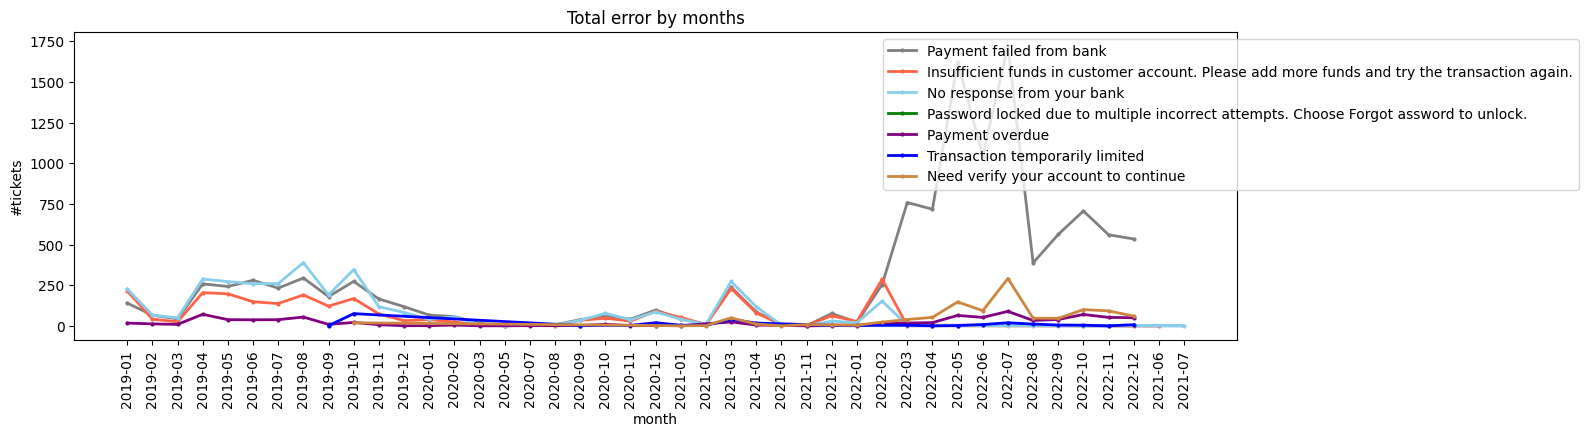

In [ ]:
# Error group allocation:

error_color_pairs = [('Payment failed from bank', 'gray'),
('Insufficient funds in customer account. Please add more funds and try the transaction again.', 'tomato'),
('No response from your bank', 'skyblue'), ('Password locked due to multiple incorrect attempts. Choose Forgot assword to unlock.', 'green'), ('Payment overdue', 'purple'), ('Transaction temporarily limited', 'blue'), ('Need verify your account to continue', 'peru')]
plt.figure(figsize=(15, 4))

for error, color in error_color_pairs:

  df_err_line = df_error[df_error['description']==error]
  plt.plot(df_err_line ['year_month'], df_err_line['n_ords'], label=error, marker='o', color=color, linewidth=2, markersize= 2)

plt.title('Total error by months')

plt.xlabel('month')

plt.ylabel('#tickets')

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.xticks(rotation=90)

plt.show()

In [ ]:
#Lỗi từ bank tăng đột biến???

 **SR = 0%, why and how?**

In [ ]:
list_str_0 = list(df_customer_value[df_customer_value['success_rate'] < 0.1]['customer_id'].unique())

In [ ]:
df_customer_value.head()

,customer_id,n_total,n_failed,n_success,s_money,s_discount,n_days,n_months,n_promotions,success_rate,promotion_rate,discount_rate,n_order_dis,n_promo_dis
0,100001,1,0,1.0,7.42,2.06,1.0,1.0,1.0,1.0,1.000000,0.277628,1.0,1.0
1,100003,6,0,6.0,60.95,2.56,6.0,6.0,1.0,1.0,0.166667,0.042002,6.0,1.0
2,100004,1,0,1.0,32.25,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000,1.0,0.0
3,100005,1,0,1.0,9.49,2.06,1.0,1.0,1.0,1.0,1.000000,0.217071,1.0,1.0
4,100006,1,0,1.0,12.37,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000,1.0,0.0


In [ ]:
def calculate_n_promotion(x):
   return (x == 'promotion').sum()

df_sr_0_metric = (
  df_join_all[df_join_all['customer_id'].isin(list_str_0)]
  .assign(date=pd.to_datetime(df_join_all['time']).dt.date)
  .groupby('customer_id')
  .agg(
      n_orders=('ticket_id', 'count'),
      s_money=('original_price', 'sum'),
      s_discount=('discount_value', 'sum'),
      n_promotions=('type', calculate_n_promotion)
  )
  .astype({'n_orders': int, 'n_promotions': int})
  .reset_index()
)

In [ ]:
df_sr_0_metric['promotion_rate'] = df_sr_0_metric['n_promotions'] / df_sr_0_metric['n_orders']
df_sr_0_metric['discount_rate'] = df_sr_0_metric['s_discount'] / df_sr_0_metric['s_money']

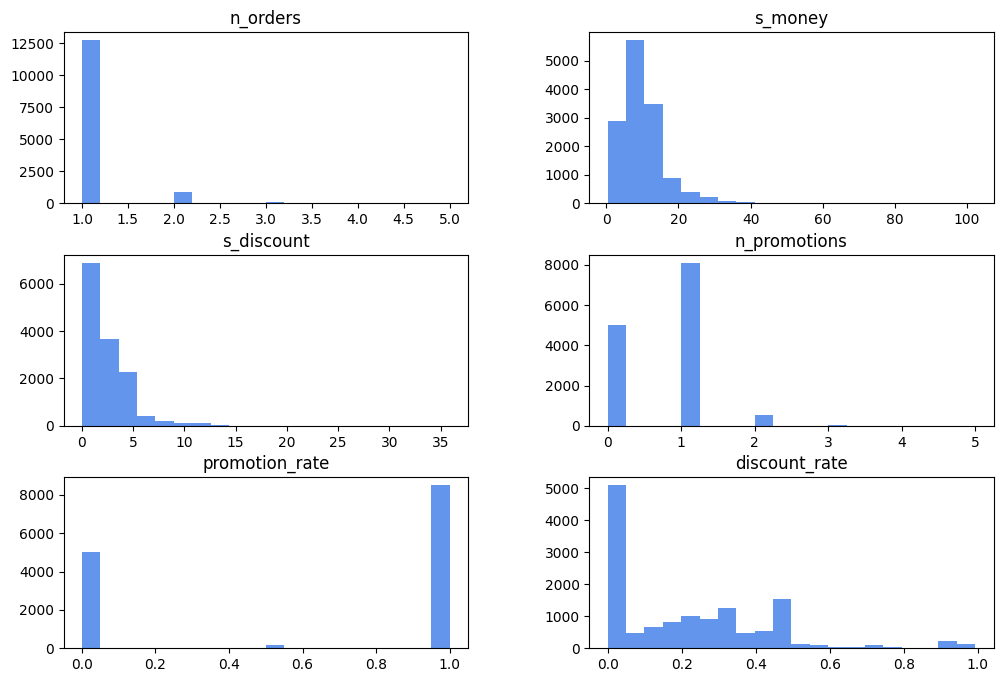

In [ ]:
df_sr_0_metric.iloc[:, 1:].hist(figsize=(12, 8), grid = False, color='cornflowerblue', bins = 20)
plt.show()

In [ ]:
# Họ bị lỗi gì mà tại sao failed 1 lần và stop luôn? Họ không retry?

In [ ]:
#Detail error
#Phân bố nhóm lỗi:
df_error_0 = (
    df_join_all[(df_join_all['status_id'] != 1) & (df_join_all['customer_id'].isin(list_str_0))]
.groupby(['year_month', 'description'])
.agg(n_ords = ('ticket_id', 'count'))
.sort_values(by= 'year_month', ascending = True)
)

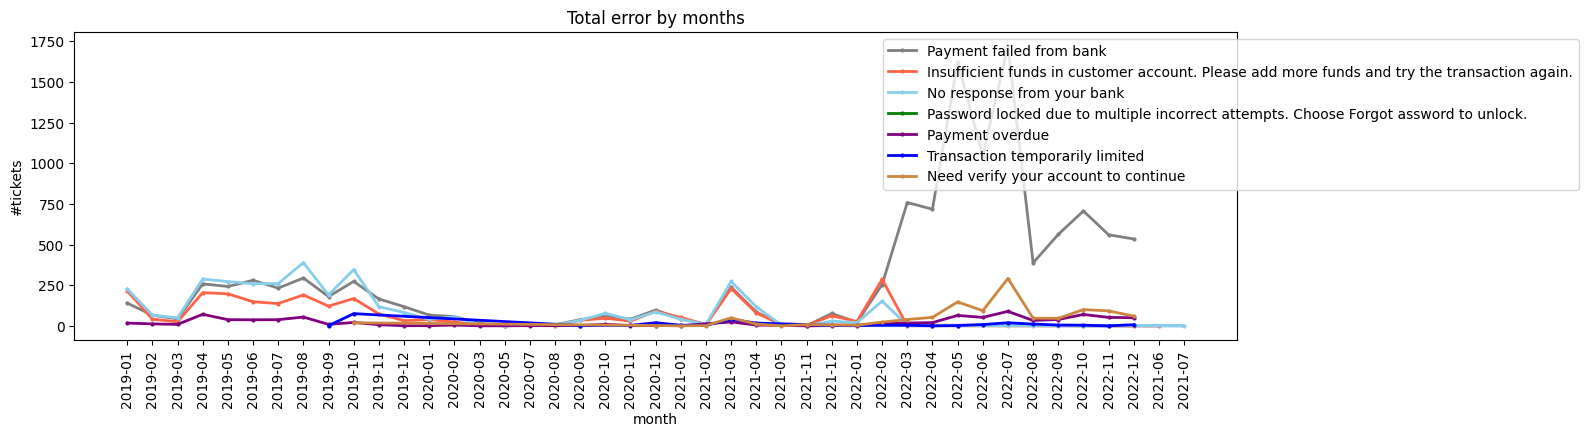

In [ ]:
#Phân bố nhóm lỗi
error_color_pairs = [('Payment failed from bank', 'gray'),
('Insufficient funds in customer account. Please add more funds and try the transaction again.', 'tomato'),
('No response from your bank', 'skyblue'), ('Password locked due to multiple incorrect attempts. Choose Forgot assword to unlock.', 'green'), ('Payment overdue', 'purple'), ('Transaction temporarily limited', 'blue'), ('Need verify your account to continue', 'peru')]
plt.figure(figsize=(15, 4))

for error, color in error_color_pairs:

  df_err_line = df_error[df_error['description']==error]
  plt.plot(df_err_line ['year_month'], df_err_line['n_ords'], label=error, marker='o', color=color, linewidth=2, markersize= 2)

plt.title('Total error by months')

plt.xlabel('month')

plt.ylabel('#tickets')

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.xticks(rotation=90)

plt.show()

**Notes**
>- Nhóm bị lỗi này cũng gần như là nhóm bị lỗi của toàn bộ KH (Nhìn lại chart hist phía trên )
>- Lý do lỗi và stop là do:
>>- 1. Lỗi bên bank và họ không chủ động được nữa
>>-2. Lỗi định danh tài khoản -> nghi ngờ gian lận hoặc không đủ điều kiện để update level tài khoản